## Import the necessary libraries

In [ ]:
# Libraries for data manpulation 
import pandas as pd
import numpy as np

# Libraries for data visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Enable rendering of higher resolution images
%config InlineBackend.figure_format = "retina"

# Enable display of all rows and all columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

#Disable display of scientific notations in the output 
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Library for supressing warnings
import warnings
warnings.filterwarnings("ignore")

#Import the function to split the data
from sklearn.model_selection import train_test_split

# Library for missing value imputation
from sklearn.impute import SimpleImputer

# Libraries for scaling, label encoding and one hot encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Libraries to build models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier, VotingClassifier
)

from sklearn.naive_bayes import GaussianNB

# Libraries for different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    auc,
    roc_curve,
    recall_score,
    roc_auc_score, 
    precision_recall_curve,
    precision_recall_fscore_support,
    f1_score,
    average_precision_score,
    classification_report
)

# Functions for tuning the model for tuning the model
from sklearn.model_selection import GridSearchCV

# Enable pretty display of outputs
from pprint import pprint

## Dataset Description - GLEAS_DX: Gleason Score at Initial diagnosis, see detail definition in wiki data description -TSTAG_DX:Primary Tumor-stage - AGEGRP2:Age Group (3 category) - RACE_C:Race - BMI:Baseline Body Mass Index (kg/m2) - HEIGHTBL: Baseline Height in cm - WEIGHTBL: Baseline Weight in kg -REGION_C:Region of the World - SMOKE:Ever Smoked - SMOKFREQ:Smoking Frequency - SMOKSTAT:Current Smoking Status - ECOG_C:Baseline Patient Performance Status - TRT1_ID:Treatment 1 product - TRT2_ID:Treatment 2 product (docetaxel) - TRT3_ID:Treatment 3 product (prednisone except AZ) - ALP:BASELINE LAB VALUE: ALKALINE PHOSPHATASE U/L - ALT:BASELINE LAB VALUE: ALANINE TRANSAMINASE U/L - AST:BASELINE LAB VALUE: ASPARTATE AMINOTRANSFERASE U/L -CA:BASELINE LAB VALUE: CALCIUM MMOL/L - CREAT:BASELINE LAB VALUE: CREATININE UMOL/L - HB:BASELINE LAB VALUE: HEMOGLOBIN G/DL - LDH:BASELINE LAB VALUE: LACTATE DEHYDROGENASE U/L - NEU:BASELINE LAB VALUE: NEUTROPHILS 10^9/L - PLT:BASELINE LAB VALUE: PLATELET COUNT 10^9/L -PSA:BASELINE LAB VALUE: PROSTATE SPECIFIC ANTIGEN NG/ML -TBILI:BASELINE LAB VALUE: TOTAL BILIRUBIN UMOL/L -TESTO:BASELINE LAB VALUE: TESTOSTERONE NMOL/L -WBC:BASELINE LAB VALUE: WHITE BLOOD CELLS 10^9/L -CREACL:BASELINE LAB VALUE: CREATININE CLEARANCE ML/MIN -NA.:BASELINE LAB VALUE: SODIUM MMOL/L -MG:BASELINE LAB VALUE: MAGNESIUM MMOL/L -PHOS: BASELINE LAB VALUE: PHOSPHORUS MMOL/L -ALB:BASELINE LAB VALUE: ALBUMIN G/L -TPRO: BASELINE LAB VALUE: TOTAL PROTEIN G/L -RBC: BASELINE LAB VALUE: RED BLOOD CELLS 10^12/L -LYM:BASELINE LAB VALUE: LYMPHOCYTES 10^9/L -BUN:BASELINE LAB VALUE: BLOOD UREA NITROGEN MMOL/L -CCRC: BASELINE LAB VALUE: CALCULATED CREATININE CLEARANCE ML/MIN -GLU:BASELINE LAB VALUE: GLUCOSE MMOL/L -CREACLCA:BASELINE LAB VALUE: CREATININE CLEARANCE CALCUL. (COCKCROFT AND GAULT) ML/MIN -NON_TARGET:Baseline Non-Target Lesion(s), target vs. non-target lesion definition -TARGET:Baseline Target Lesion(s), target vs. non-target lesion -BONE:Baseline Bone Lesion(s) -RECTAL:Baseline Rectal Lesion(s) -LYMPH_NODES:Baseline Lymph Node Lesion(s) -KIDNEYS: Baseline Kidney Lesion(s) -LUNGS:Baseline Lung Lesion(s) -LIVER:Baseline Liver Lesion(s) -PLEURA:Baseline Pleura Lesion(s) -OTHER:Baseline Other Lesion(s) -PROSTATE:Baseline Prostate Lesion(s) -ADRENAL:Baseline Adrenal Lesion(s) -BLADDER:Baseline Bladder Lesion(s) -PERITONEUM:Baseline Peritoneum Lesion(s) -COLON:Baseline Colon Lesion(s) -HEAD_AND_NECK:Baseline Head and Neck Lesion(s) -SOFT_TISSUE:Baseline Soft Tissue Lesion(s) -STOMACH:Baseline Stomach Lesion(s) -PANCREAS:Baseline Pancreas Lesion(s) -THYROID:Baseline Thyroid Lesion(s) -ABDOMINAL: Baseline Abdominal Lesion(s) -ORCHIDECTOMY:Prior Orchidectomy(includes bilateral) -PROSTATECTOMY:Prior Prostatectomy -TURP:Prior Turp -LYMPHADENECTOMY:Prior Bilateral Lymphadenectomy -SPINAL_CORD_SURGERY:Prior Spinal Cord Surgery -BILATERAL_ORCHIDECTOMY:Prior Bilateral Orchidectomy -PRIOR_RADIOTHERAPY:Prior Radiotherapy -ANALGESICS:Prior analgesics -ANTI_ANDROGENS:Prior Anti-Androgens -GLUCOCORTICOID:Prior Glucocorticoids -GONADOTROPIN:Prior Gomadotropin -BISPHOSPHONATE:Prior Bisphosponate -CORTICOSTEROID:Prior Corticosteroid -IMIDAZOLE:Prior Imidazole -ACE_INHIBITORS:Prior ACE Inhibitors -BETA_BLOCKING:Prior Beta Blocking Agents -HMG_COA_REDUCT:Prior HMG COA Reductase Inhibitors -ESTROGENS:Prior Estrogens -ANTI_ESTROGENS:Prior Anti-Estrogens -ARTTHROM:MEDICAL HISTORY: ARTERIAL THROMBOSIS -CEREBACC:MEDICAL HISTORY: CEREBROVASCULAR ACCIDENT (HEMORRHAGIC AND/OR ISCHEMIC) -CHF:MEDICAL HISTORY: CONGESTIVE HEART FAILURE -DVT:MEDICAL HISTORY: DEEP VENOUS THROMBOSIS (DVT) -DIAB:MEDICAL HISTORY: DIABETES -GASTREFL:MEDICAL HISTORY: GASTROESOPHAGEAL REFLUX DISEASE (GERD) -GIBLEED:MEDICAL HISTORY: GASTROINTESTINAL (GI) BLEED -MI:MEDICAL HISTORY: MYOCARDIAL INFARCTION (MI) -PUD:MEDICAL HISTORY: PEPTIC ULCER DISEASE (PUD) -PULMEMB:MEDICAL HISTORY: PULMONARY EMBOLISM (PE) -PATHFRAC:MEDICAL HISTORY: PATHOLOGICAL BONE FRACTURES -SPINCOMP:MEDICAL HISTORY: SPINAL CORD COMPRESSION -COPD:MEDICAL HISTORY: CHRONIC OBSTRUCTIVE PULMONARY DISEASE -MHBLOOD:MEDICAL HISTORY (Body system): BLOOD & LYMPHATIC SYSTEM -MHCARD:MEDICAL HISTORY (Body system): CARDIAC DISORDERS -MHCONGEN:MEDICAL HISTORY (Body system): CONGENITAL, FAMILIAL & GENETIC -MHEAR:MEDICAL HISTORY (Body system): EAR & LABYRINTH -MHENDO:MEDICAL HISTORY (Body system): ENDOCRINE DISORDERS -MHEYE:MEDICAL HISTORY (Body system): EYE DISORDERS -MHGASTRO:MEDICAL HISTORY (Body system): GASTROINTESTINAL DISORDERS -MHGEN:MEDICAL HISTORY (Body system): GEN DISORD & ADMIN SITE -MHHEPATO:MEDICAL HISTORY (Body system): HEPATOBILIARY DISORDERS -MHIMMUNE:MEDICAL HISTORY (Body system): IMMUNE SYSTEM DISORDERS -MHINFECT:MEDICAL HISTORY (Body system): INFECTIONS & INFESTATIONS -MHINJURY:MEDICAL HISTORY (Body system): INJURY, POISON & PROCEDURAL -MHINVEST:MEDICAL HISTORY (Body system): INVESTIGATIONS -MHMETAB:MEDICAL HISTORY (Body system): METABOLISM & NUTRITION -MHMUSCLE:MEDICAL HISTORY (Body system): MUSC/SKELETAL & CONNECT TISSUE -MHNEOPLA:MEDICAL HISTORY (Body system): NEOPLASMS BENIGN, MALIG & UNSPEC -MHNERV:MEDICAL HISTORY (Body system): NERVOUS SYSTEM DISORDERS -MHPSYCH:MEDICAL HISTORY (Body system): PSYCHIATRIC DISORDERS -MHRENAL:MEDICAL HISTORY (Body system): RENAL & URINARY DISORDERS -MHRESP:MEDICAL HISTORY (Body system): RESP, THORACIC & MEDIASTINAL -MHSKIN:MEDICAL HISTORY (Body system): SKIN & SUBCUTANEOUS TISSUE -MHSOCIAL:MEDICAL HISTORY (Body system): SOCIAL CIRCUMSTANCES -MHSURG:MEDICAL HISTORY (Body system): SURGICAL & MEDICAL PROCEDURES -MHVASC:MEDICAL HISTORY (Body system): VASCULAR DISORDERS -DEATH:Patient Died Flag -ENDTRS_C:Discontinue Trt Reason (category) 
-DISCONT:Discontinue Flag


In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving Celgene.csv to Celgene.csv


In [ ]:
#Load in the data
data = pd.read_csv("Celgene.csv")

### Let's have an overview of the data

In [ ]:
#Check the first few rows
data.head()

,GLEAS_DX,TSTAG_DX,AGEGRP2,RACE_C,BMI,HEIGHTBL,WEIGHTBL,REGION_C,SMOKE,SMOKFREQ,SMOKSTAT,ECOG_C,TRT1_ID,TRT2_ID,TRT3_ID,ALP,ALT,AST,CA,CREAT,HB,LDH,NEU,PLT,PSA,TBILI,TESTO,WBC,CREACL,NA.,MG,PHOS,ALB,TPRO,RBC,LYM,BUN,CCRC,GLU,CREACLCA,NON_TARGET,TARGET,BONE,RECTAL,LYMPH_NODES,KIDNEYS,LUNGS,LIVER,PLEURA,OTHER,PROSTATE,ADRENAL,BLADDER,PERITONEUM,COLON,HEAD_AND_NECK,SOFT_TISSUE,STOMACH,PANCREAS,THYROID,ABDOMINAL,ORCHIDECTOMY,PROSTATECTOMY,TURP,LYMPHADENECTOMY,SPINAL_CORD_SURGERY,BILATERAL_ORCHIDECTOMY,PRIOR_RADIOTHERAPY,ANALGESICS,ANTI_ANDROGENS,GLUCOCORTICOID,GONADOTROPIN,BISPHOSPHONATE,CORTICOSTEROID,IMIDAZOLE,ACE_INHIBITORS,BETA_BLOCKING,HMG_COA_REDUCT,ESTROGENS,ANTI_ESTROGENS,ARTTHROM,CEREBACC,CHF,DVT,DIAB,GASTREFL,GIBLEED,MI,PUD,PULMEMB,PATHFRAC,SPINCOMP,COPD,MHBLOOD,MHCARD,MHCONGEN,MHEAR,MHENDO,MHEYE,MHGASTRO,MHGEN,MHHEPATO,MHIMMUNE,MHINFECT,MHINJURY,MHINVEST,MHMETAB,MHMUSCLE,MHNEOPLA,MHNERV,MHPSYCH,MHRENAL,MHRESP,MHSKIN,MHSOCIAL,MHSURG,MHVASC,DEATH,ENDTRS_C,DISCONT
0,7.396,T3,65-74,White,26.800,175.000,82.000,WESTERN EUROPE,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,2.000,PLACEBO,DOCETAXEL,PREDNISONE,153,21.000,17.000,2.410,103.000,12.600,162.000,3.710,389.000,45.200,8.000,0.863,5.010,81.029,140.000,0.850,1.120,41.000,69.000,4.540,0.700,7.900,71.000,5.100,82.992,Y,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,progression,0
1,7.396,T3,65-74,White,27.400,179.000,87.800,EASTERN EUROPE,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,1.000,PLACEBO,DOCETAXEL,PREDNISONE,69,15.000,27.000,2.210,79.000,9.600,151.000,2.480,238.000,71.200,4.000,0.863,4.370,81.029,133.000,0.690,1.040,33.000,121.000,3.020,1.640,12.200,94.000,4.700,82.992,Y,Y,Y,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,possible_AE,0
2,7.396,T3,18-64,White,28.700,170.000,83.000,WESTERN EUROPE,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,0.000,PLACEBO,DOCETAXEL,PREDNISONE,102,18.000,23.000,2.230,56.000,13.000,194.000,2.980,345.000,597.000,4.000,0.729,4.010,81.029,137.000,0.860,1.240,39.000,61.000,4.330,0.540,4.800,155.000,7.500,82.992,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,YES,NO,YES,YES,NO,NO,NO,NO,YES,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,possible_AE,0
3,7.396,T3,65-74,White,27.900,169.000,79.600,WESTERN EUROPE,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,1.000,PLACEBO,DOCETAXEL,PREDNISONE,62,9.000,16.000,2.440,73.000,12.900,231.000,5.200,429.000,257.614,4.000,0.863,6.350,81.029,141.000,0.830,1.070,44.000,76.000,4.570,0.850,5.800,97.903,12.800,82.992,Y,Y,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,YES,YES,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,NO,YES,progression,0
4,7.396,T3,18-64,White,33.200,182.100,108.000,NORTH AMERICA,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,1.000,PLACEBO,DOCETAXEL,PREDNISONE,95,31.000,18.000,2.380,106.000,11.300,237.000,1.880,119.000,13.300,7.000,0.863,2.980,81.029,138.000,0.900,1.100,45.000,62.000,3.800,0.850,7.900,97.903,17.000,82.992,Y,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,YES,YES,YES,YES,NO,NO,NO,NO,YES,YES,NO,NO,N,N,N,N,Y,N,N,N,N,N,N,N,N,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,YES,YES,YES,YES,NO,NO,NO,YES,YES,NO,possible_AE,0


In [ ]:
#Check the first few columns
data.tail()

,GLEAS_DX,TSTAG_DX,AGEGRP2,RACE_C,BMI,HEIGHTBL,WEIGHTBL,REGION_C,SMOKE,SMOKFREQ,SMOKSTAT,ECOG_C,TRT1_ID,TRT2_ID,TRT3_ID,ALP,ALT,AST,CA,CREAT,HB,LDH,NEU,PLT,PSA,TBILI,TESTO,WBC,CREACL,NA.,MG,PHOS,ALB,TPRO,RBC,LYM,BUN,CCRC,GLU,CREACLCA,NON_TARGET,TARGET,BONE,RECTAL,LYMPH_NODES,KIDNEYS,LUNGS,LIVER,PLEURA,OTHER,PROSTATE,ADRENAL,BLADDER,PERITONEUM,COLON,HEAD_AND_NECK,SOFT_TISSUE,STOMACH,PANCREAS,THYROID,ABDOMINAL,ORCHIDECTOMY,PROSTATECTOMY,TURP,LYMPHADENECTOMY,SPINAL_CORD_SURGERY,BILATERAL_ORCHIDECTOMY,PRIOR_RADIOTHERAPY,ANALGESICS,ANTI_ANDROGENS,GLUCOCORTICOID,GONADOTROPIN,BISPHOSPHONATE,CORTICOSTEROID,IMIDAZOLE,ACE_INHIBITORS,BETA_BLOCKING,HMG_COA_REDUCT,ESTROGENS,ANTI_ESTROGENS,ARTTHROM,CEREBACC,CHF,DVT,DIAB,GASTREFL,GIBLEED,MI,PUD,PULMEMB,PATHFRAC,SPINCOMP,COPD,MHBLOOD,MHCARD,MHCONGEN,MHEAR,MHENDO,MHEYE,MHGASTRO,MHGEN,MHHEPATO,MHIMMUNE,MHINFECT,MHINJURY,MHINVEST,MHMETAB,MHMUSCLE,MHNEOPLA,MHNERV,MHPSYCH,MHRENAL,MHRESP,MHSKIN,MHSOCIAL,MHSURG,MHVASC,DEATH,ENDTRS_C,DISCONT
521,7.396,T3,65-74,White,27.700,160.300,69.900,NORTH AMERICA,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,0.000,PLACEBO,DOCETAXEL,PREDNISONE,45,38.000,39.000,2.380,71.000,13.900,224.000,4.370,209.000,68.900,9.000,0.863,4.840,81.029,139.000,0.900,1.060,52.000,76.000,4.460,0.260,7.500,97.903,9.900,82.992,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,YES,NO,YES,NO,NO,YES,NO,YES,YES,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,YES,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,NO,YES,YES,NO,NO,YES,NO,possible_AE,0
522,7.396,T3,18-64,White,30.800,179.500,97.400,NORTH AMERICA,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,0.000,PLACEBO,DOCETAXEL,PREDNISONE,237,24.000,28.000,2.330,106.000,12.700,250.000,9.010,611.000,24.900,3.000,0.863,11.880,81.029,133.000,0.850,1.030,41.000,68.000,4.510,1.820,7.900,87.000,16.300,82.992,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,NO,YES,YES,YES,YES,NO,YES,YES,YES,YES,NO,NO,N,N,N,N,Y,N,N,N,N,N,N,N,N,YES,NO,YES,NO,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,YES,YES,NO,NO,YES,NO,NO,NO,NO,YES,NO,AE,0
523,7.396,T3,>=75,White,25.900,173.700,76.300,OTHER,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,1.000,PLACEBO,DOCETAXEL,PREDNISONE,155,15.000,22.000,1.890,112.000,9.400,230.000,5.540,194.000,72.700,7.000,0.863,7.010,81.029,140.000,0.840,0.670,33.000,63.000,3.470,0.860,4.500,97.903,6.500,82.992,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,YES,YES,NO,YES,YES,NO,NO,NO,NO,YES,NO,NO,N,N,N,N,N,Y,N,N,N,N,N,N,N,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO,YES,NO,YES,YES,NO,progression,0
524,7.396,T3,65-74,White,27.200,176.900,83.500,NORTH AMERICA,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,0.000,PLACEBO,DOCETAXEL,PREDNISONE,69,25.000,19.000,2.250,71.000,13.400,165.000,2.060,272.000,58.700,3.000,0.863,4.040,81.029,140.000,0.800,1.230,37.000,66.000,4.280,1.590,4.600,92.000,6.200,82.992,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,YES,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,N,Y,N,N,N,N,N,Y,N,N,N,N,N,NO,YES,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,YES,NO,NO,YES,NO,YES,possible_AE,0
525,7.396,T3,65-74,White,25.100,174.000,75.000,OTHER,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,1.000,PLACEBO,DOCETAXEL,PREDNISONE,94,10.000,22.000,2.230,59.000,11.900,221.000,5.000,395.000,69.500,6.000,0.863,6.570,81.029,135.000,0.870,1.190,40.000,70.000,3.870,1.150,4.700,99.000,6.600,82.992,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,NO,YES,NO,NO,NO,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,possible_AE,0


In [ ]:
#Get information such as the data types for the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Columns: 120 entries, GLEAS_DX to DISCONT
dtypes: float64(29), int64(2), object(89)
memory usage: 493.2+ KB


In [ ]:
#Check the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") 

There are 526 rows and 120 columns.


In [ ]:
# Display the columns headers
for i,v in enumerate (data.columns):
    print(i,v)

0 GLEAS_DX
1 TSTAG_DX
2 AGEGRP2
3 RACE_C
4 BMI
5 HEIGHTBL
6 WEIGHTBL
7 REGION_C
8 SMOKE
9 SMOKFREQ
10 SMOKSTAT
11 ECOG_C
12 TRT1_ID
13 TRT2_ID
14 TRT3_ID
15 ALP
16 ALT
17 AST
18 CA
19 CREAT
20 HB
21 LDH
22 NEU
23 PLT
24 PSA
25 TBILI
26 TESTO
27 WBC
28 CREACL
29 NA.
30 MG
31 PHOS
32 ALB
33 TPRO
34 RBC
35 LYM
36 BUN
37 CCRC
38 GLU
39 CREACLCA
40 NON_TARGET
41 TARGET
42 BONE
43 RECTAL
44 LYMPH_NODES
45 KIDNEYS
46 LUNGS
47 LIVER
48 PLEURA
49 OTHER
50 PROSTATE
51 ADRENAL
52 BLADDER
53 PERITONEUM
54 COLON
55 HEAD_AND_NECK
56 SOFT_TISSUE
57 STOMACH
58 PANCREAS
59 THYROID
60 ABDOMINAL
61 ORCHIDECTOMY
62 PROSTATECTOMY
63 TURP
64 LYMPHADENECTOMY
65 SPINAL_CORD_SURGERY
66 BILATERAL_ORCHIDECTOMY
67 PRIOR_RADIOTHERAPY
68 ANALGESICS
69 ANTI_ANDROGENS
70 GLUCOCORTICOID
71 GONADOTROPIN
72 BISPHOSPHONATE
73 CORTICOSTEROID
74 IMIDAZOLE
75 ACE_INHIBITORS
76 BETA_BLOCKING
77 HMG_COA_REDUCT
78 ESTROGENS
79 ANTI_ESTROGENS
80 ARTTHROM
81 CEREBACC
82 CHF
83 DVT
84 DIAB
85 GASTREFL
86 GIBLEED
87 MI
88 PUD
89 P

In [ ]:
# The column headers are all in capital letters

In [ ]:
#Change the column headers to lowercase
data.columns = [x.lower() for x in data.columns]

In [ ]:
#Check the columns headers again
for i,v in enumerate (data.columns):
    print(i,v)

0 gleas_dx
1 tstag_dx
2 agegrp2
3 race_c
4 bmi
5 heightbl
6 weightbl
7 region_c
8 smoke
9 smokfreq
10 smokstat
11 ecog_c
12 trt1_id
13 trt2_id
14 trt3_id
15 alp
16 alt
17 ast
18 ca
19 creat
20 hb
21 ldh
22 neu
23 plt
24 psa
25 tbili
26 testo
27 wbc
28 creacl
29 na.
30 mg
31 phos
32 alb
33 tpro
34 rbc
35 lym
36 bun
37 ccrc
38 glu
39 creaclca
40 non_target
41 target
42 bone
43 rectal
44 lymph_nodes
45 kidneys
46 lungs
47 liver
48 pleura
49 other
50 prostate
51 adrenal
52 bladder
53 peritoneum
54 colon
55 head_and_neck
56 soft_tissue
57 stomach
58 pancreas
59 thyroid
60 abdominal
61 orchidectomy
62 prostatectomy
63 turp
64 lymphadenectomy
65 spinal_cord_surgery
66 bilateral_orchidectomy
67 prior_radiotherapy
68 analgesics
69 anti_androgens
70 glucocorticoid
71 gonadotropin
72 bisphosphonate
73 corticosteroid
74 imidazole
75 ace_inhibitors
76 beta_blocking
77 hmg_coa_reduct
78 estrogens
79 anti_estrogens
80 artthrom
81 cerebacc
82 chf
83 dvt
84 diab
85 gastrefl
86 gibleed
87 mi
88 pud
89 p

In [ ]:
# They are all now in lowercase

In [ ]:
#Check for duplicates:
sum(data.duplicated())

0

 - It is observed that there are no duplicates in the data

In [ ]:
#Check for missing values
#We round up to 2 decimal places
round(data.isnull().sum() / data.isnull().count() * 100, 2)

gleas_dx                 0.000
tstag_dx                 0.000
agegrp2                  0.000
race_c                   0.000
bmi                      0.000
heightbl                 0.000
weightbl                 0.000
region_c                 0.000
smoke                    0.000
smokfreq                 0.000
smokstat                 0.000
ecog_c                   0.000
trt1_id                  0.000
trt2_id                  0.000
trt3_id                  0.000
alp                      0.000
alt                      0.000
ast                      0.000
ca                       0.000
creat                    0.000
hb                       0.000
ldh                      0.000
neu                      0.000
plt                      0.000
psa                      0.000
tbili                    0.000
testo                    0.000
wbc                      0.000
creacl                   0.000
na.                      0.000
mg                       0.000
phos                     0.000
alb     

In [ ]:
#Drop columns not needed
data.drop(columns=["tstag_dx","smoke","smokfreq","smokstat","trt1_id","trt2_id","trt3_id"],inplace =True)

In [ ]:
# Making a list of all categorical variables
cat_col = [
    "agegrp2","race_c", "region_c", "non_target", "target", "bone", "rectal",
    "lymph_nodes", "kidneys", "lungs", "liver", "pleura", "other", "prostate",
    "adrenal", "bladder", "peritoneum", "colon", "head_and_neck",
    "soft_tissue", "stomach", "pancreas", "thyroid", "abdominal",
    "orchidectomy", "prostatectomy", "turp", "lymphadenectomy",
    "spinal_cord_surgery", "bilateral_orchidectomy", "prior_radiotherapy",
    "analgesics", "anti_androgens", "glucocorticoid", "gonadotropin",
    "bisphosphonate", "corticosteroid", "imidazole", "ace_inhibitors",
    "beta_blocking", "hmg_coa_reduct", "estrogens", "anti_estrogens",
    "artthrom", "cerebacc", "chf", "dvt", "diab", "gastrefl", "gibleed", "mi",
    "pud", "pulmemb", "pathfrac", "spincomp", "copd", "mhblood", "mhcard",
    "mhcongen", "mhear", "mhendo", "mheye", "mhgastro", "mhgen", "mhhepato",
    "mhimmune", "mhinfect", "mhinjury", "mhinvest", "mhmetab", "mhmuscle",
    "mhneopla", "mhnerv", "mhpsych", "mhrenal", "mhresp", "mhskin", "mhsocial",
    "mhsurg", "mhvasc", "death", "endtrs_c"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 35)

65-74    246
18-64    171
>=75     109
Name: agegrp2, dtype: int64
-----------------------------------
White    488
Black     25
Other     13
Name: race_c, dtype: int64
-----------------------------------
WESTERN EUROPE    253
NORTH AMERICA     139
EASTERN EUROPE     84
OTHER              50
Name: region_c, dtype: int64
-----------------------------------
Y    501
N     25
Name: non_target, dtype: int64
-----------------------------------
Y    293
N    233
Name: target, dtype: int64
-----------------------------------
Y    439
N     87
Name: bone, dtype: int64
-----------------------------------
N    521
Y      5
Name: rectal, dtype: int64
-----------------------------------
Y    298
N    228
Name: lymph_nodes, dtype: int64
-----------------------------------
N    521
Y      5
Name: kidneys, dtype: int64
-----------------------------------
N    452
Y     74
Name: lungs, dtype: int64
-----------------------------------
N    468
Y     58
Name: liver, dtype: int64
------------------------

In [ ]:
#Backup the original data
df_backup = data.copy()

## Exploratory Data Analysis

### Descriptive Statistics

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gleas_dx,526.000,7.396,0.000,7.396,7.396,7.396,7.396,7.396
bmi,526.000,28.562,4.984,18.100,25.100,27.950,31.100,54.300
heightbl,526.000,174.366,7.902,131.500,169.200,175.000,180.000,198.700
weightbl,526.000,86.383,16.181,50.000,75.050,84.750,94.375,159.600
ecog_c,526.000,0.552,0.579,0.000,0.000,1.000,1.000,3.000
alp,526.000,258.162,386.441,32.000,81.000,124.000,265.000,3159.000
alt,526.000,23.470,16.870,4.000,15.000,19.000,26.000,171.000
ast,526.000,28.368,19.196,10.000,19.000,24.000,31.000,328.000
ca,526.000,2.299,0.137,1.670,2.220,2.300,2.380,2.650
creat,526.000,84.106,27.886,34.000,70.000,80.000,93.750,504.000


In [ ]:
# Descriptive statistics of numeric columns
data.describe(include=['object']).T

,count,unique,top,freq
tstag_dx,526,1,T3,526
agegrp2,526,3,65-74,246
race_c,526,3,White,488
region_c,526,4,WESTERN EUROPE,253
smoke,526,1,NO,526
smokfreq,526,1,GREATER THAN OR EQUAL TO 1 PACK PER DAY,526
smokstat,526,1,ONGOING/CURRENT,526
trt1_id,526,1,PLACEBO,526
trt2_id,526,1,DOCETAXEL,526
trt3_id,526,1,PREDNISONE,526


### Examining the distribution of some numeric variables

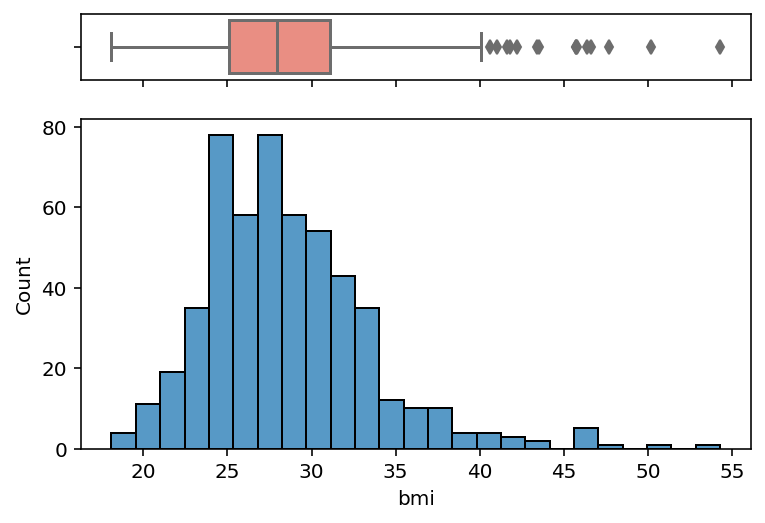

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["bmi"], ax=ax_box, color="salmon"
)  # Create the boxplot
sns.histplot(data["bmi"], ax=ax_hist)  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

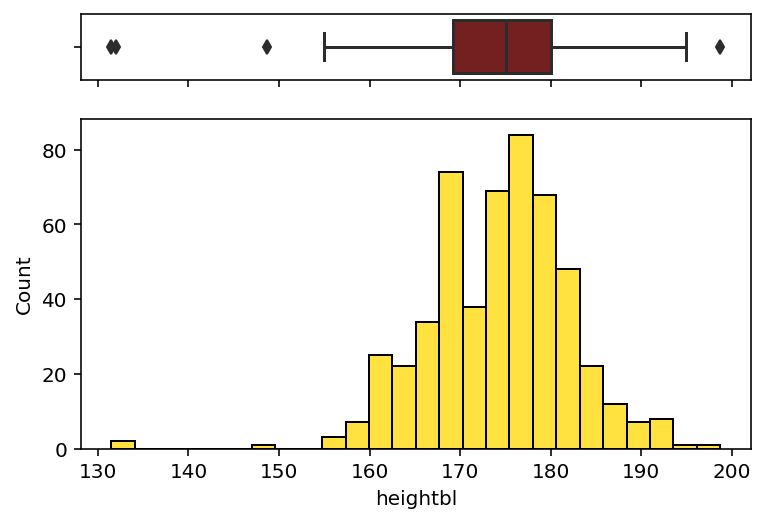

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["heightbl"], ax=ax_box, color="#821112"
)  # Create the boxplot
sns.histplot(data["heightbl"], ax=ax_hist,color='gold')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

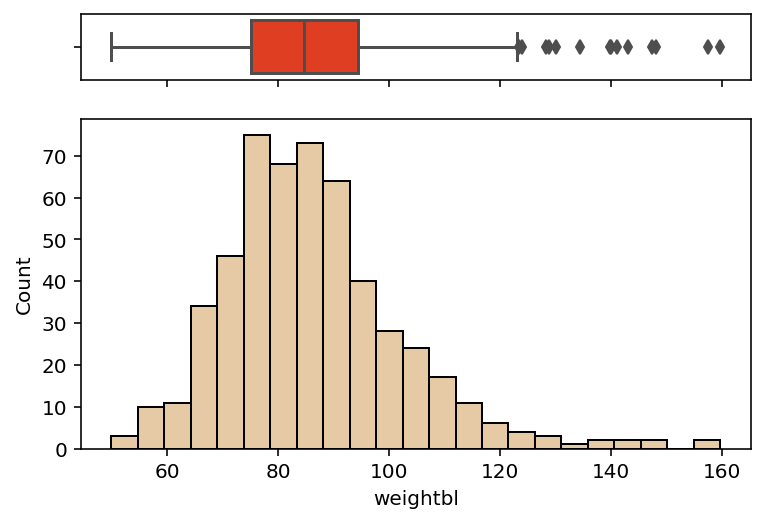

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["weightbl"], ax=ax_box, color="#ff2804"
)  # Create the boxplot
sns.histplot(data["weightbl"], ax=ax_hist,color='#deb887')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

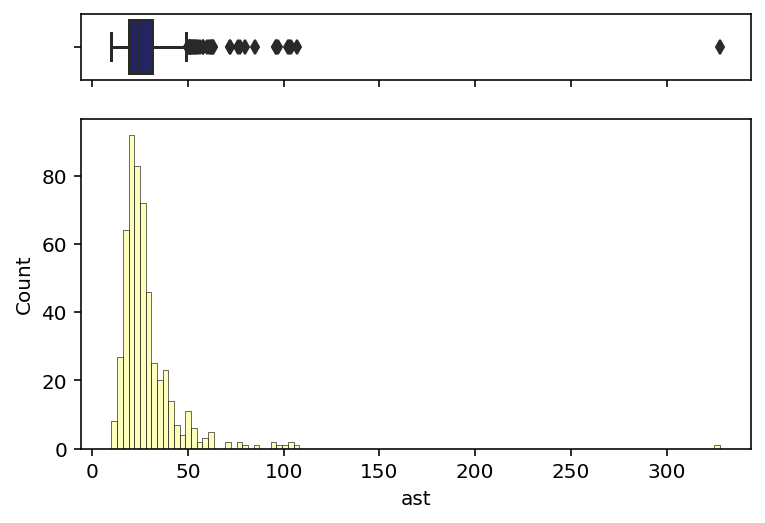

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["ast"], ax=ax_box, color="#191970"
)  # Create the boxplot
sns.histplot(data["ast"], ax=ax_hist,color='#fcffa4')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

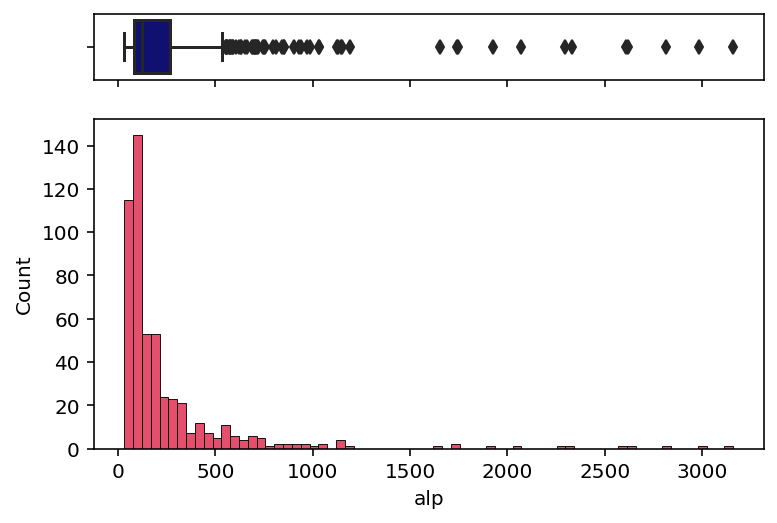

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["alp"], ax=ax_box, color="#000080"
)  # Create the boxplot
sns.histplot(data["alp"], ax=ax_hist,color='crimson')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

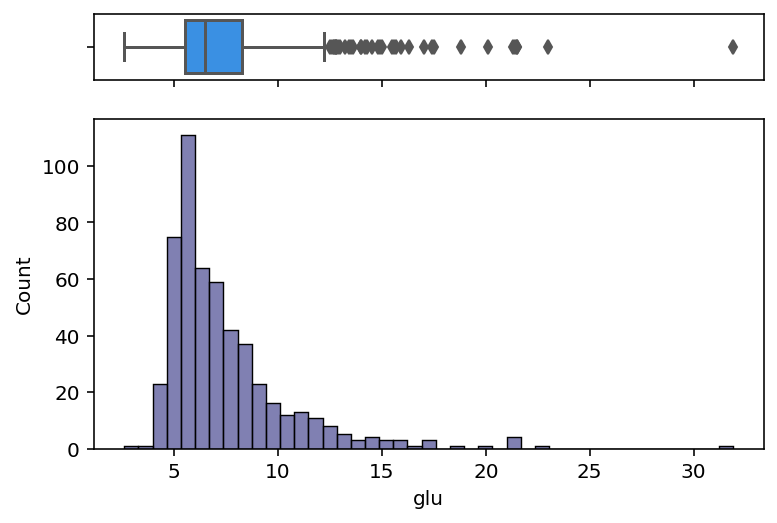

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["glu"], ax=ax_box, color="dodgerblue"
)  # Create the boxplot
sns.histplot(data["glu"], ax=ax_hist,color='#559')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

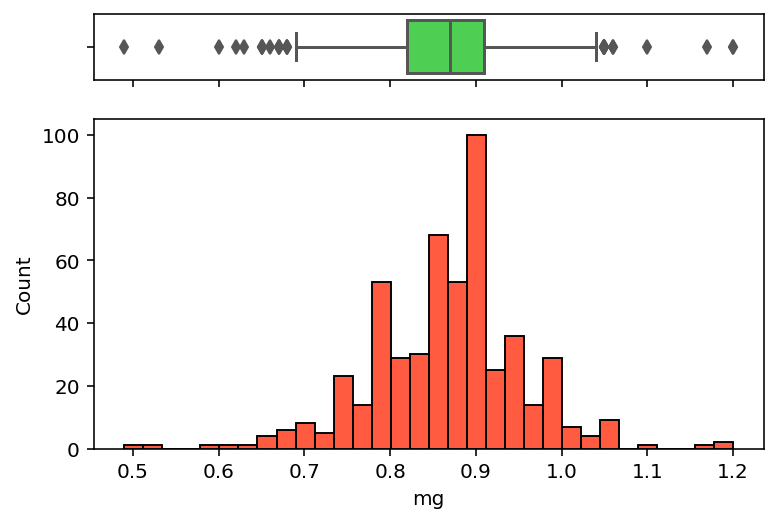

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["mg"], ax=ax_box, color="#39e440"
)  # Create the boxplot
sns.histplot(data["mg"], ax=ax_hist,color='#ff2400')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

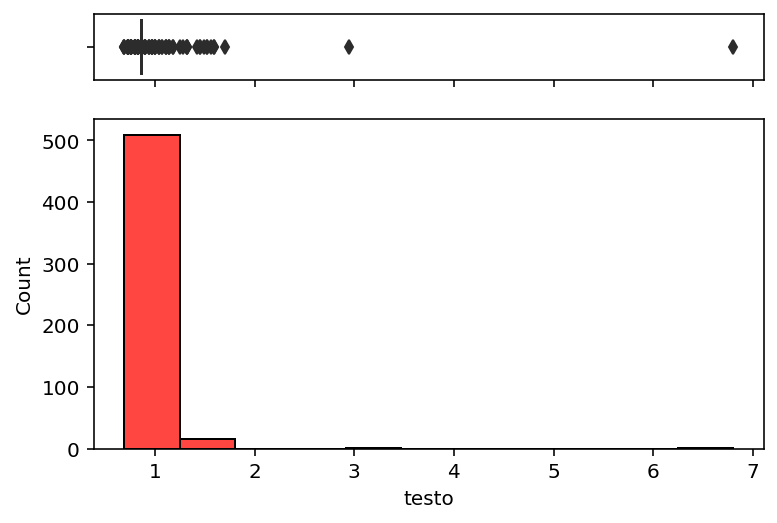

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["testo"], ax=ax_box, color="#131e7f"
)  # Create the boxplot
sns.histplot(data["testo"], ax=ax_hist,color='#ff0800')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

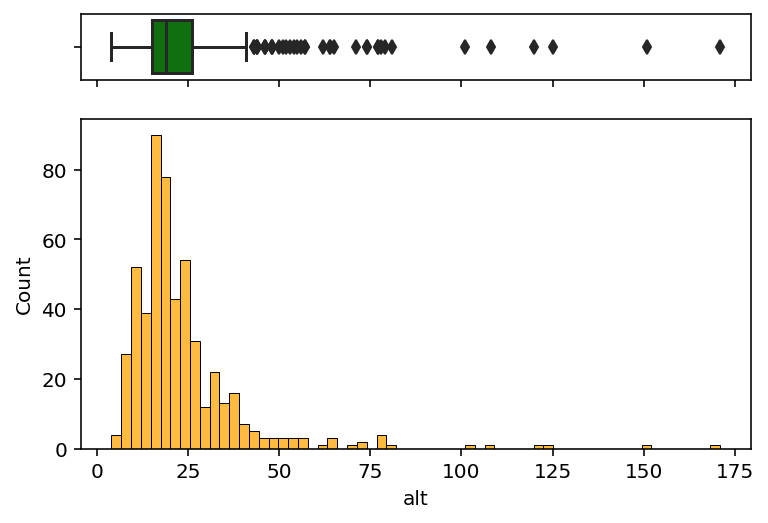

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["alt"], ax=ax_box, color="green"
)  # Create the boxplot
sns.histplot(data["alt"], ax=ax_hist,color='orange')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

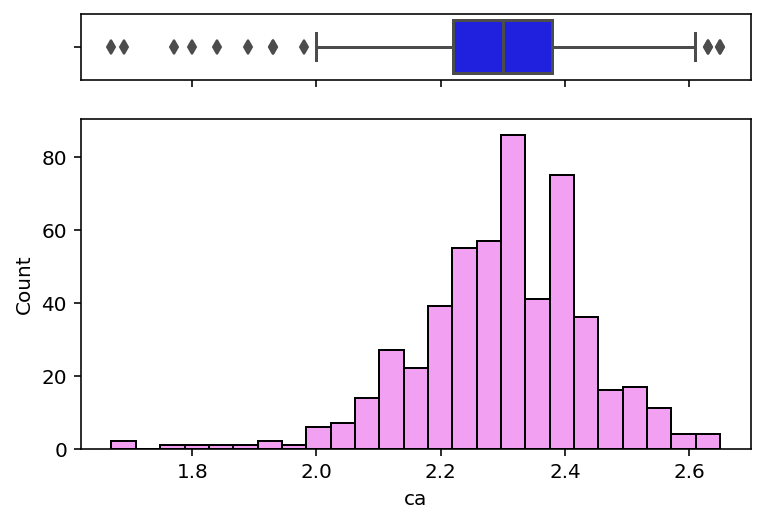

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["ca"], ax=ax_box, color="blue"
)  # Create the boxplot
sns.histplot(data["ca"], ax=ax_hist,color='violet')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

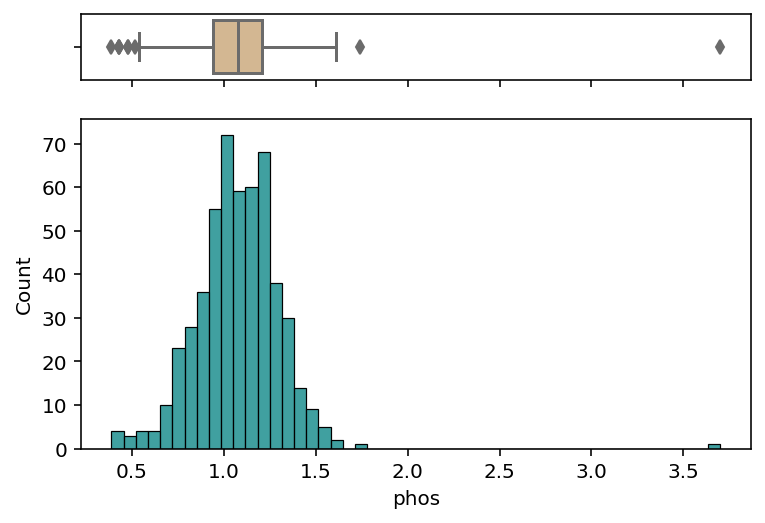

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.18, 0.90)},
)  # Create the two subplots
sns.boxplot(
    data["phos"], ax=ax_box, color="burlywood"
)  # Create the boxplot
sns.histplot(data["phos"], ax=ax_hist,color='teal')  # Create the histogram
ax_box.set(xlabel="")  # Disable label for the boxplot
plt.show()

### Barplot of some key numeric variables

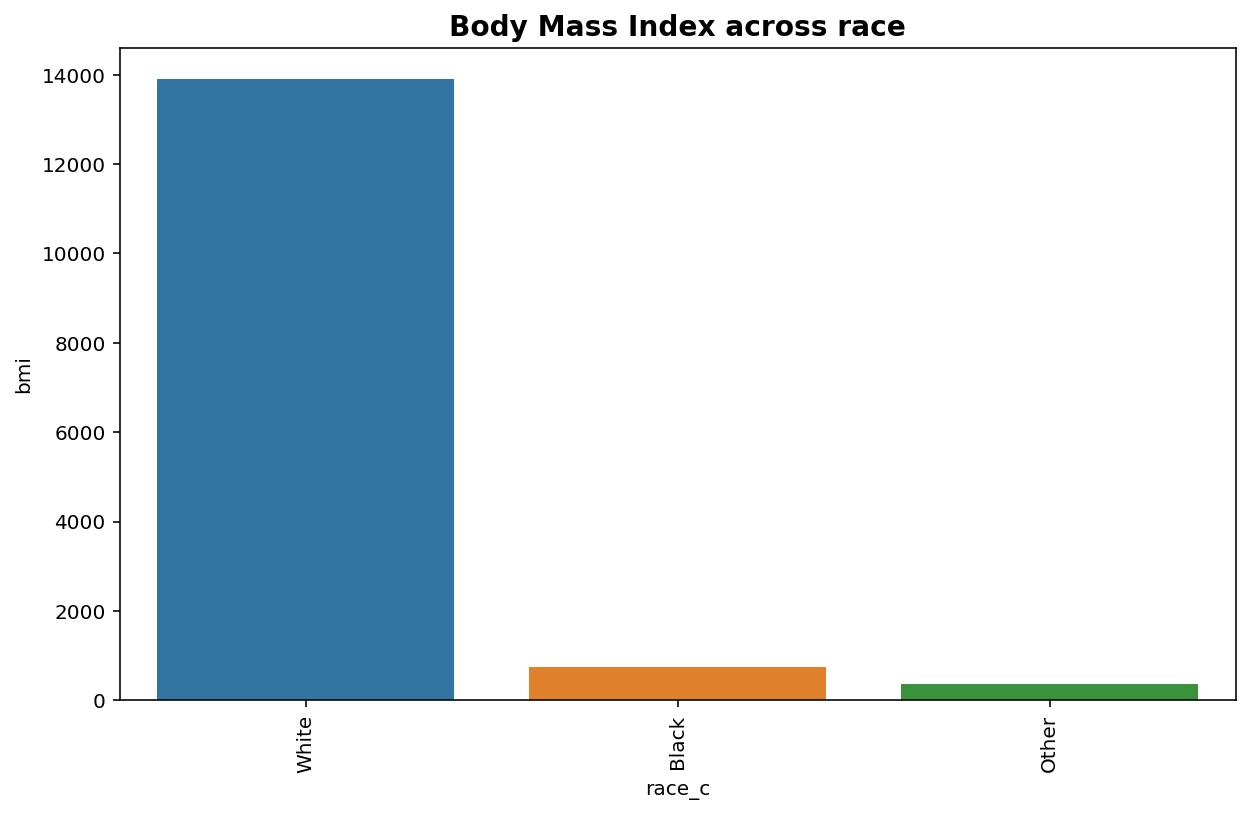

In [ ]:
plt.figure(figsize=(10,6))
plt.title(
    "Body Mass Index across race", fontsize=14, weight="bold",
)
sns.barplot(data=data, x='race_c', y='bmi', ci=False, estimator = sum)
plt.xticks(rotation=90)
plt.show()

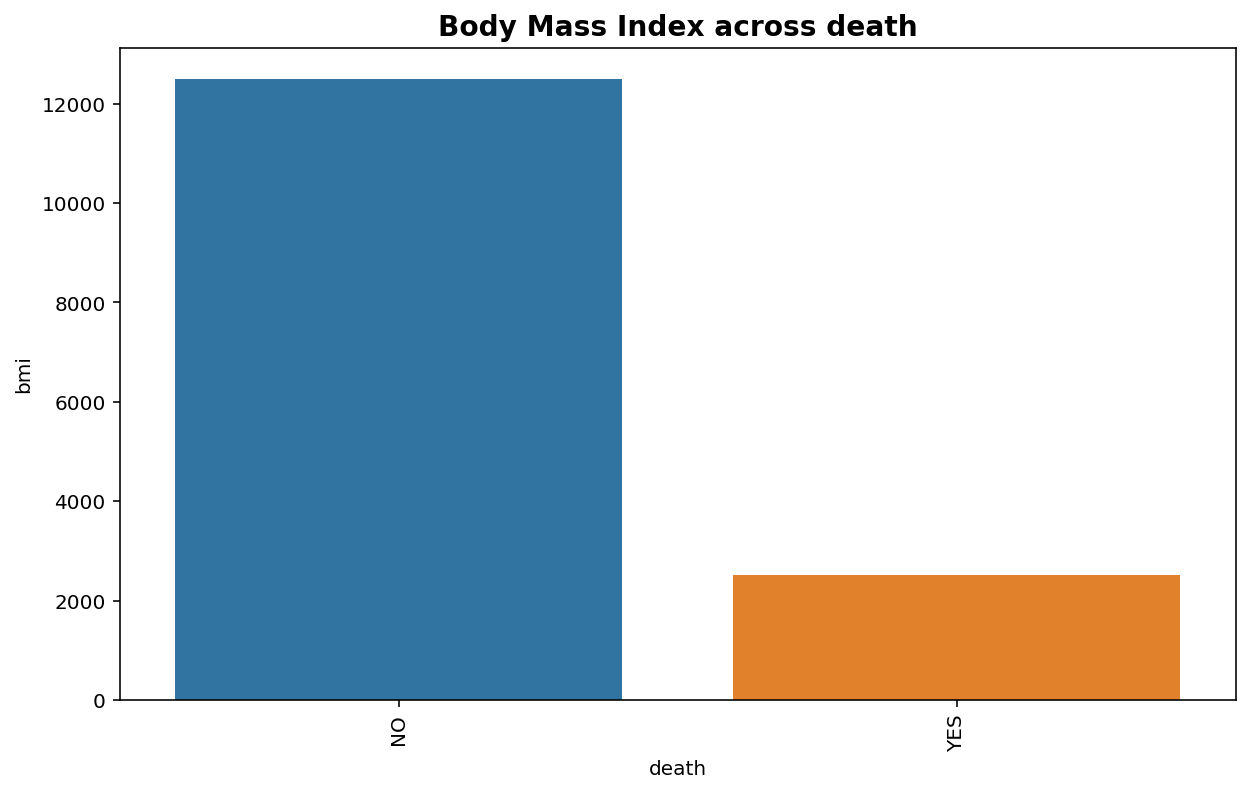

In [ ]:
plt.figure(figsize=(10,6))
plt.title(
    "Body Mass Index across death", fontsize=14, weight="bold",
)
sns.barplot(data=data, x='death', y='bmi', ci=False, estimator = sum)
plt.xticks(rotation=90)
plt.show()

### Countplot of some key categorical variables

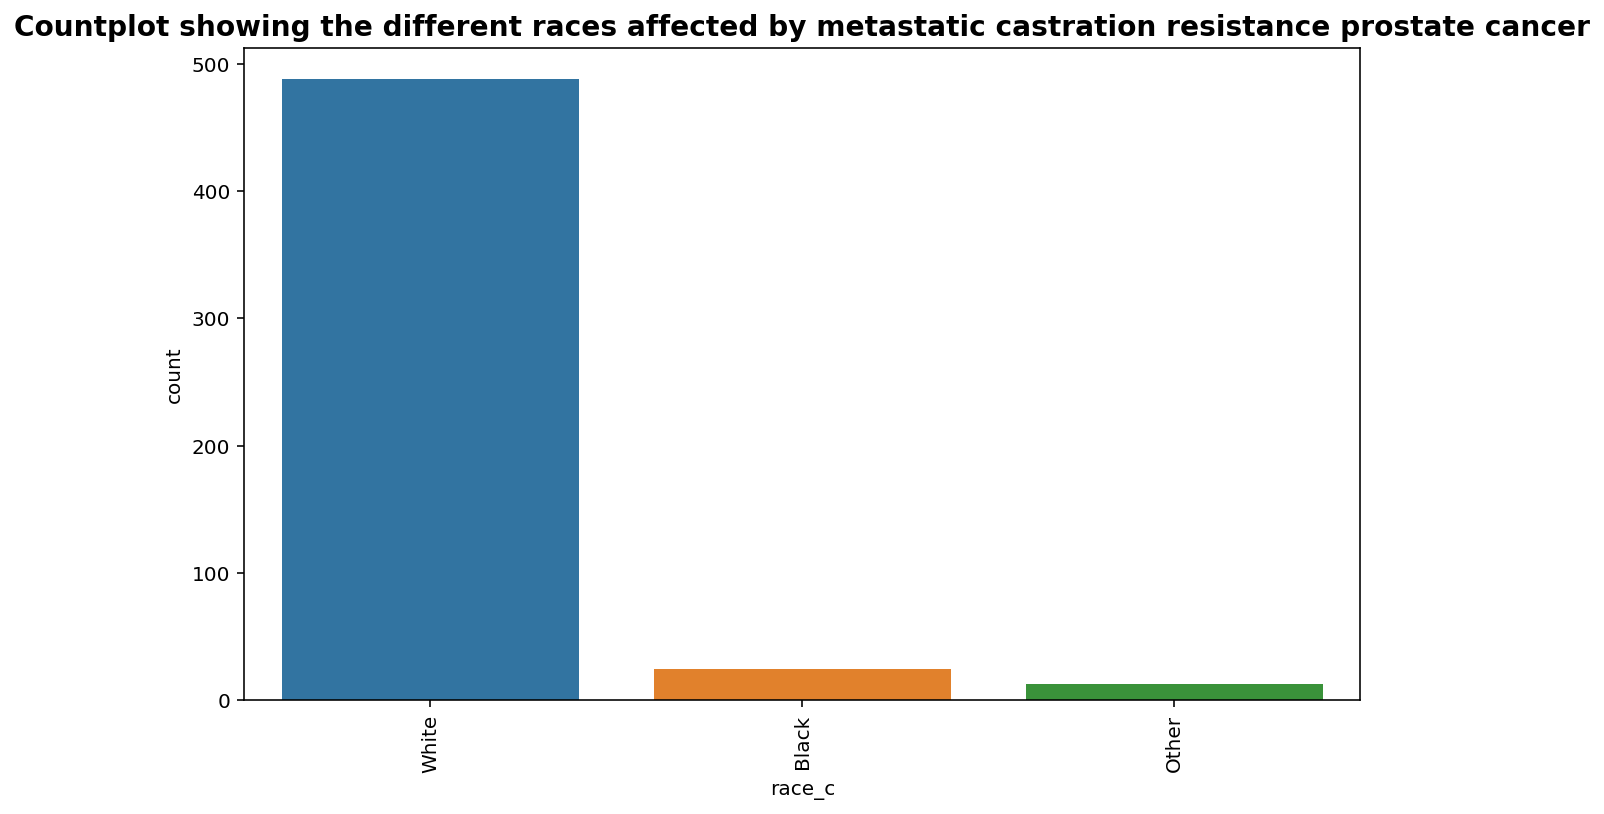

In [ ]:
plt.figure(figsize=(10,6))
plt.title(
    "Countplot showing the different races affected by metastatic castration resistance prostate cancer",
    fontsize=14,
    weight="bold",
)
sns.countplot(x="race_c", data=data)
plt.xticks(rotation=90)
plt.show()

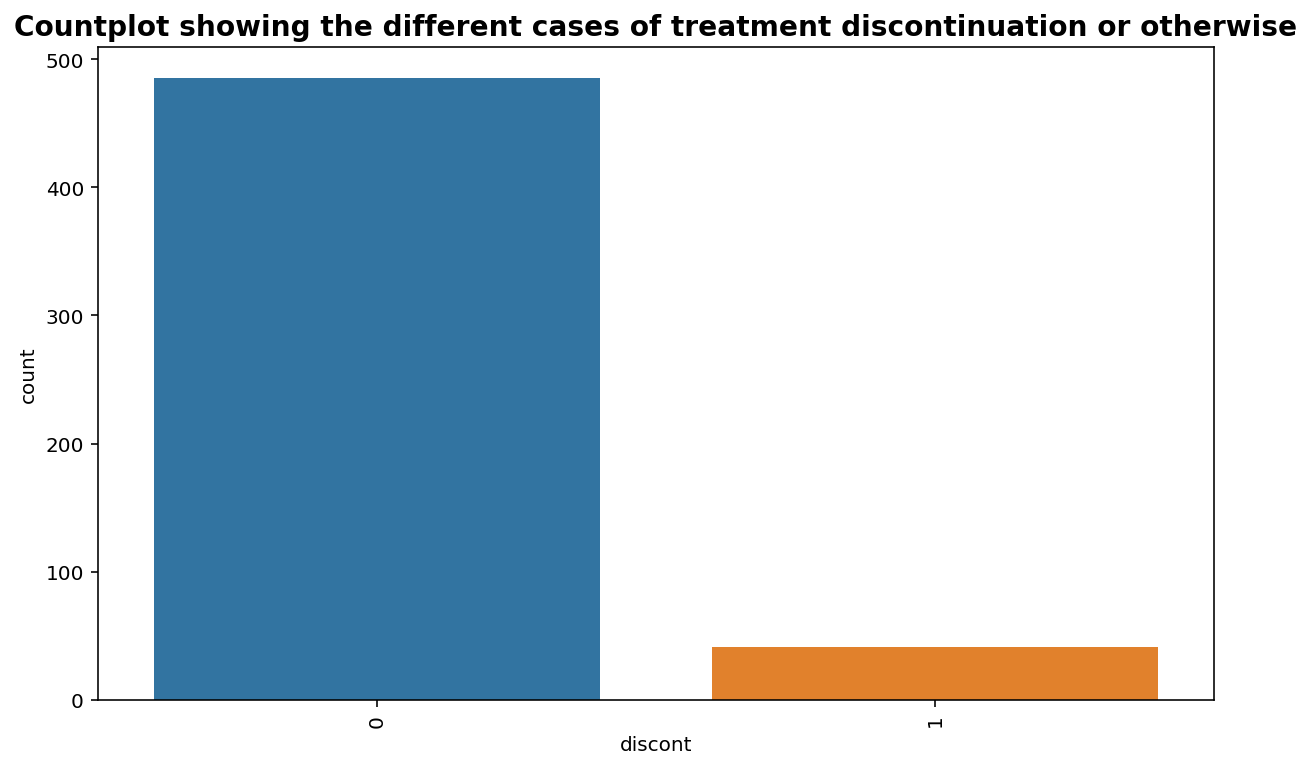

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(
    "Countplot showing the different cases of treatment discontinuation or otherwise",
    fontsize=14,
    weight="bold",
)
sns.countplot(x="discont", data=data)
plt.xticks(rotation=90)
plt.show()

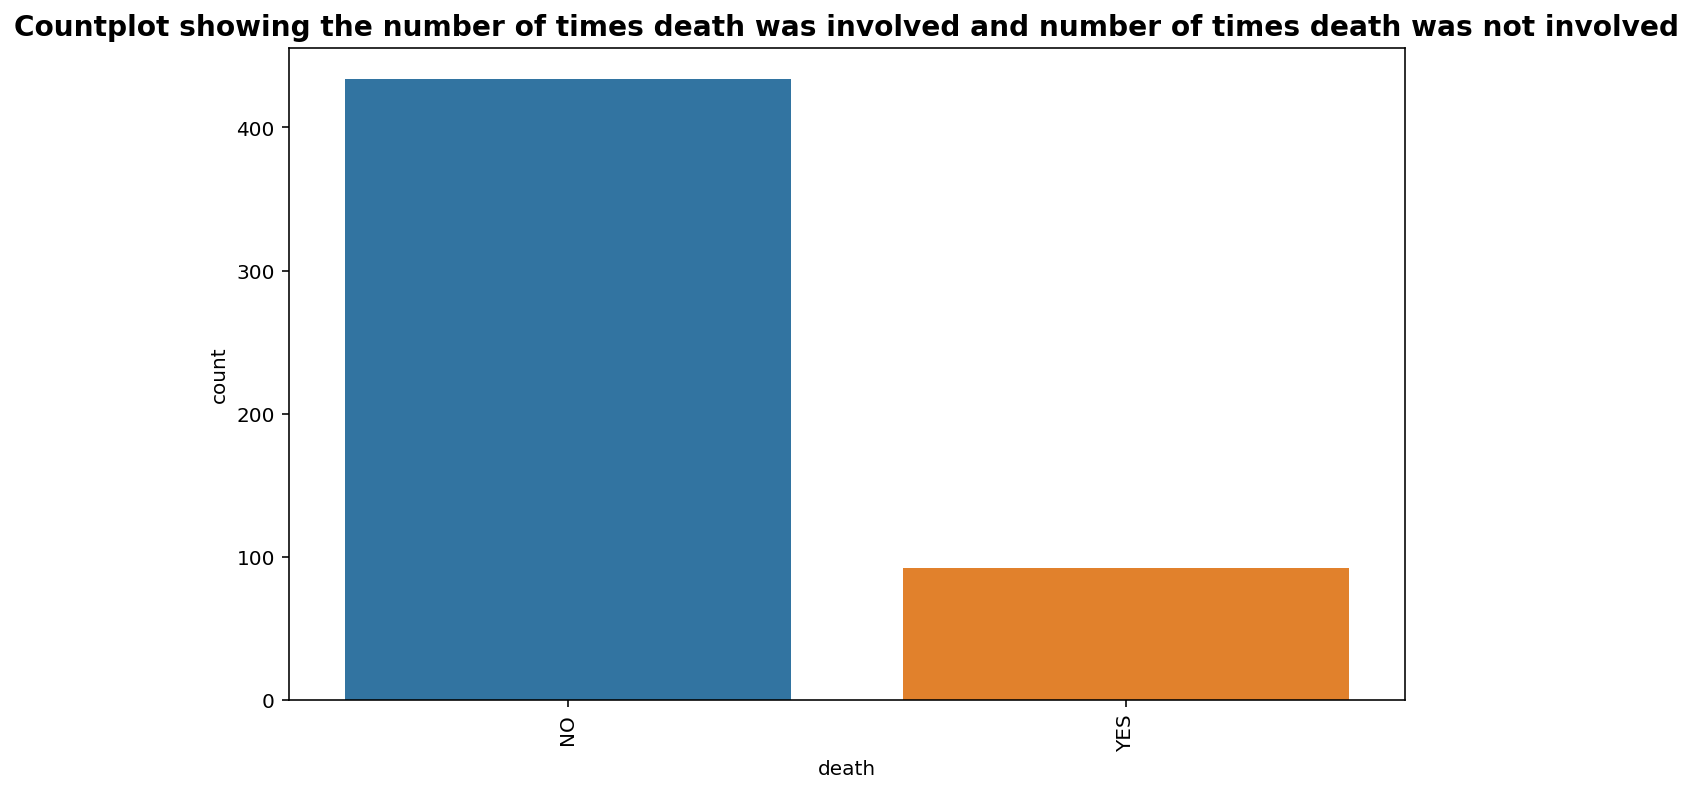

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(
    "Countplot showing the number of times death was involved and number of times death was not involved",
    fontsize=14,
    weight="bold",
)
sns.countplot(x="death", data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#There are more cases where death was not involved than cases where death was involved.

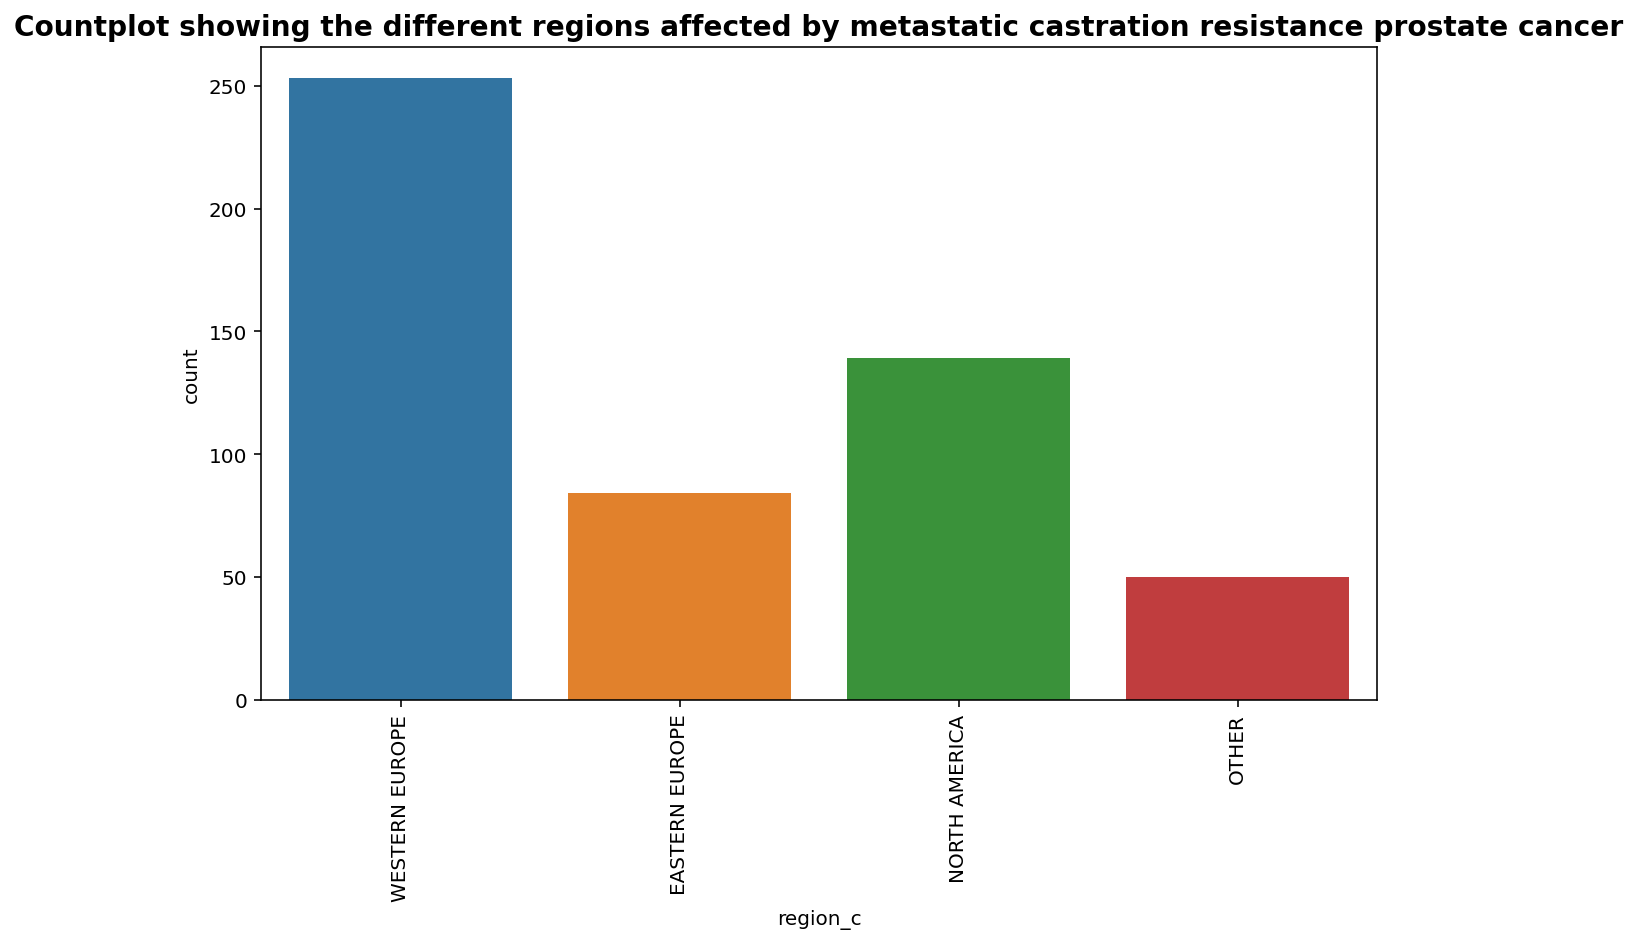

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(
    "Countplot showing the different regions affected by metastatic castration resistance prostate cancer",
    fontsize=14,
    weight="bold",
)
sns.countplot(x="region_c", data=data)
plt.xticks(rotation=90)
plt.show()

-Most patients affected are those who reside in Western Europe, followed by those in North America.

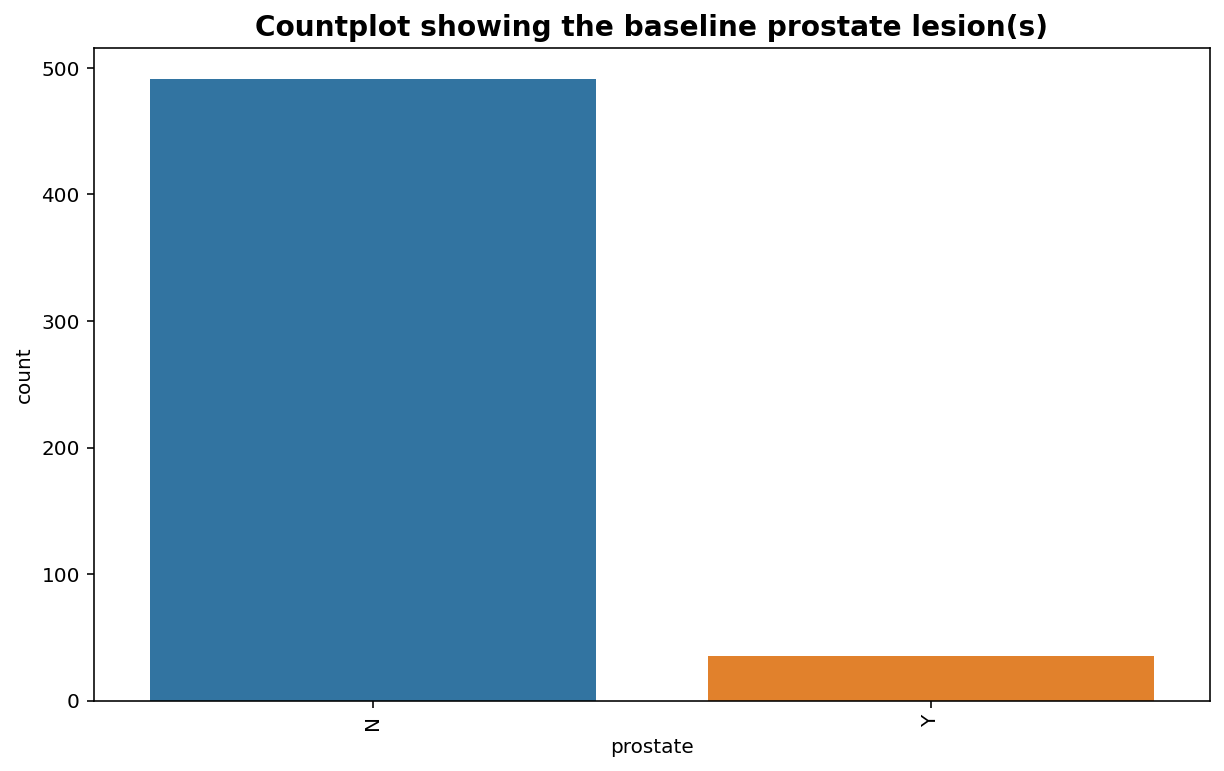

In [ ]:
plt.figure(figsize=(10,6))
plt.title(
    "Countplot showing the baseline prostate lesion(s)",
    fontsize=14,
    weight="bold",
)
sns.countplot(x="prostate", data=data)
plt.xticks(rotation=90)
plt.show()

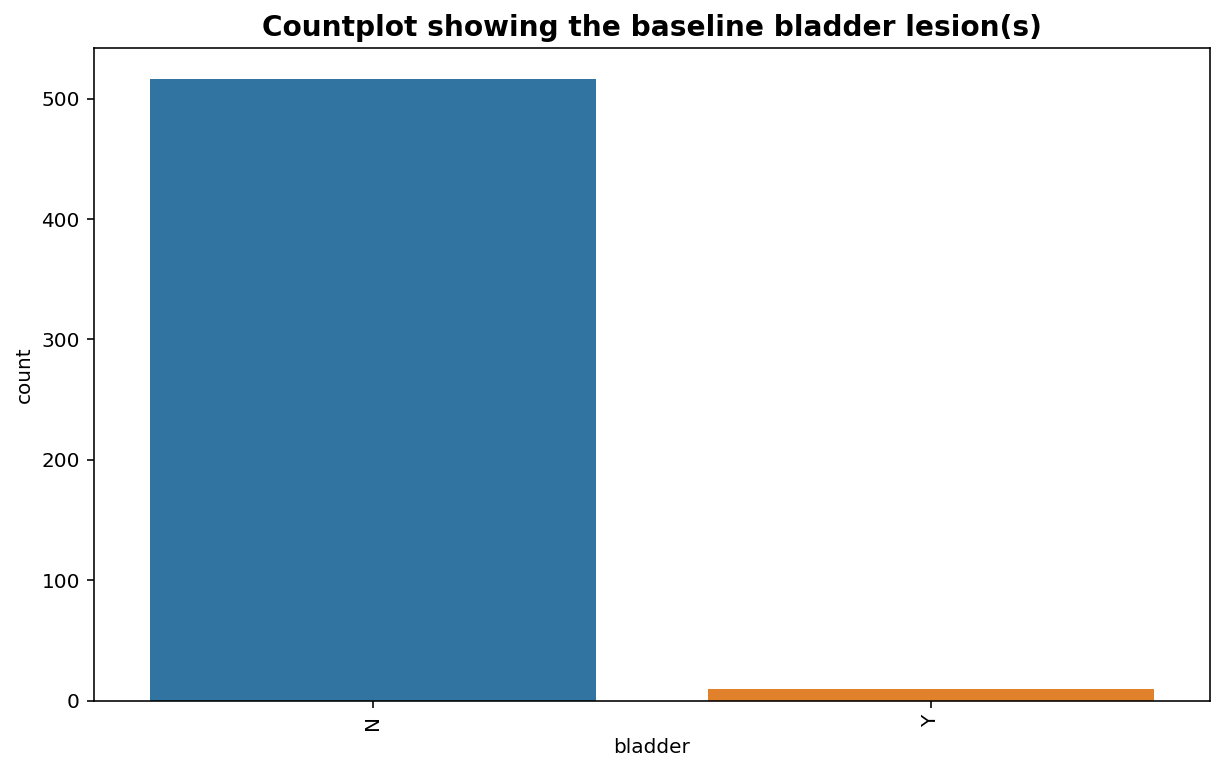

In [ ]:
plt.figure(figsize=(10,6))
plt.title(
    "Countplot showing the baseline bladder lesion(s)",
    fontsize=14,
    weight="bold",
)
sns.countplot(x="bladder", data=data)
plt.xticks(rotation=90)
plt.show()

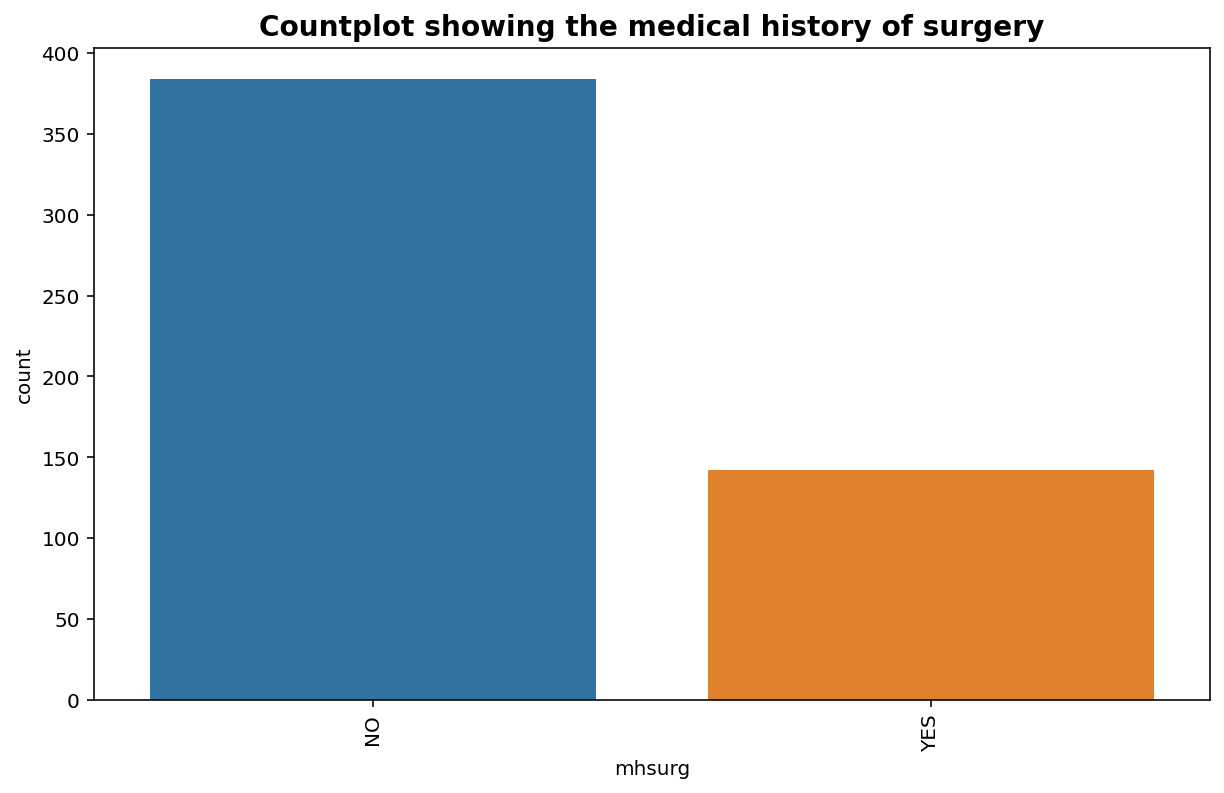

In [ ]:
plt.figure(figsize=(10,6))
plt.title(
    "Countplot showing the medical history of surgery",
    fontsize=14,
    weight="bold",
)
sns.countplot(x="mhsurg", data=data)
plt.xticks(rotation=90)
plt.show()

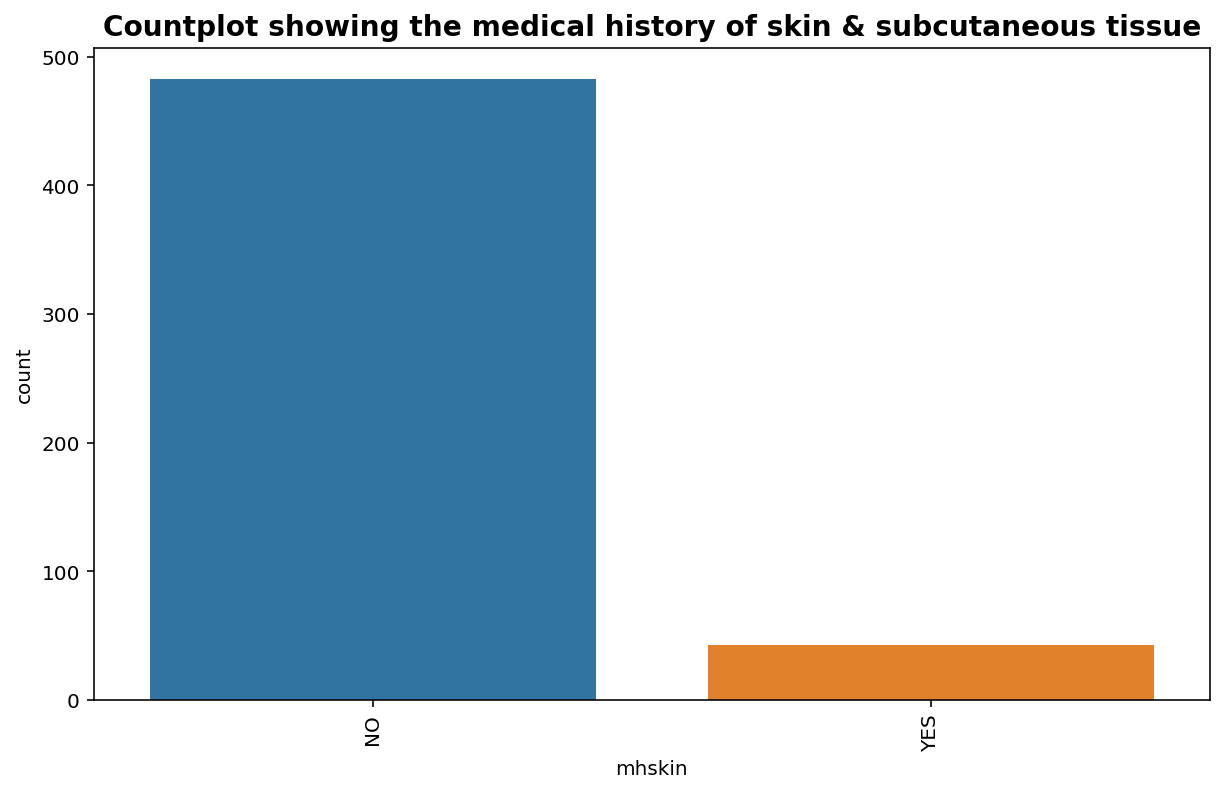

In [ ]:
plt.figure(figsize=(10,6))
plt.title(
    "Countplot showing the medical history of skin & subcutaneous tissue",
    fontsize=14,
    weight="bold",
)
sns.countplot(x="mhskin", data=data)
plt.xticks(rotation=90)
plt.show()

### Distribution of numeric variables across categorical variables

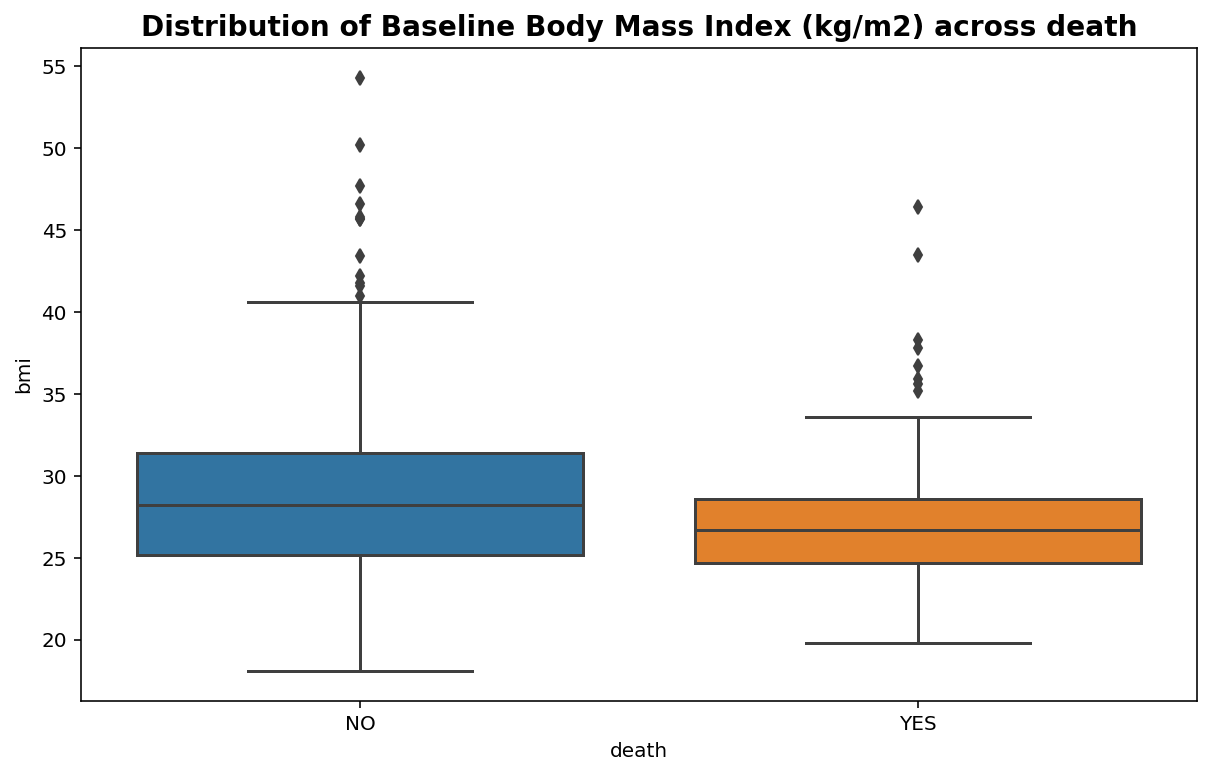

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(
    "Distribution of Baseline Body Mass Index (kg/m2) across death",
    fontsize=14,
    weight="bold",
)
sns.boxplot(x="death", y="bmi", data=data)
plt.show()

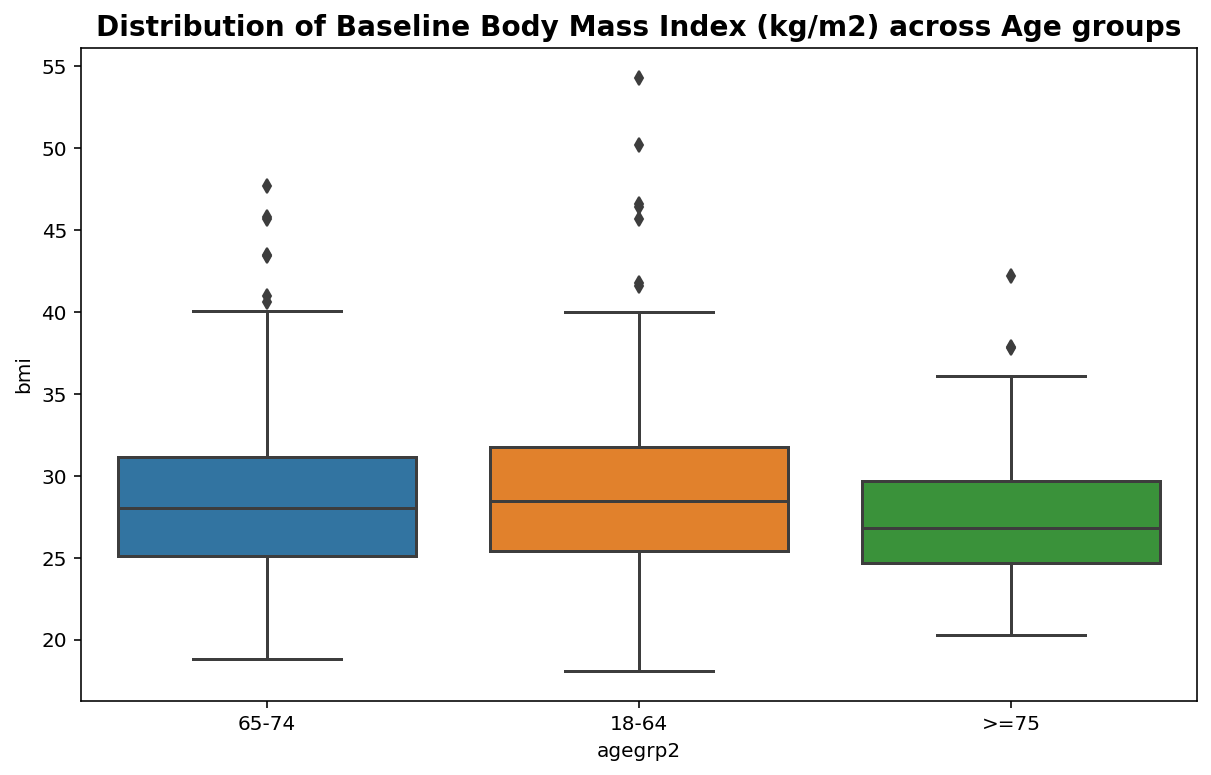

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(
    "Distribution of Baseline Body Mass Index (kg/m2) across Age groups",
    fontsize=14,
    weight="bold",
)
sns.boxplot(x="agegrp2", y="bmi", data=data)
plt.show()

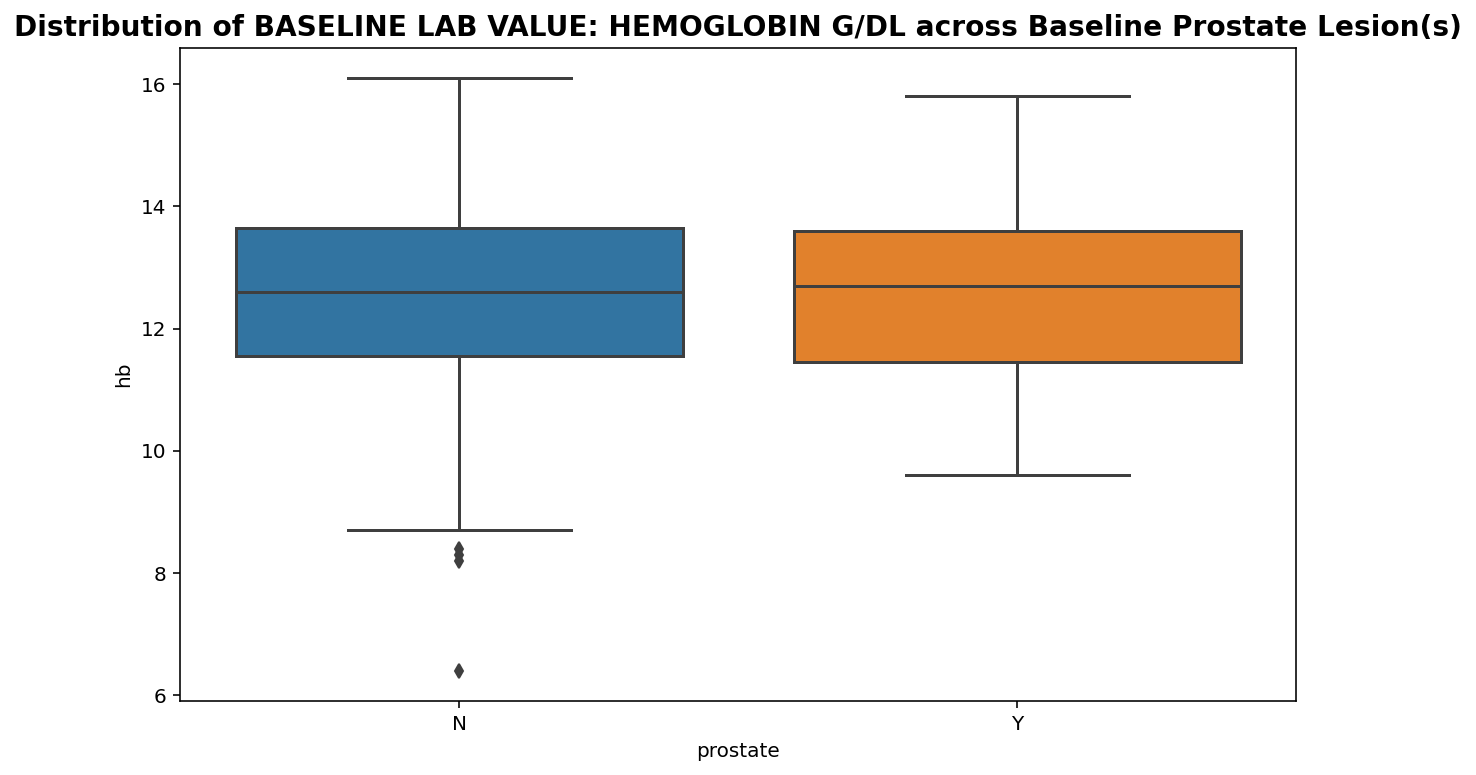

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(
    "Distribution of BASELINE LAB VALUE: HEMOGLOBIN G/DL across Baseline Prostate Lesion(s)",
    fontsize=14,
    weight="bold",
)
sns.boxplot(x="prostate", y="hb", data=data)
plt.show()

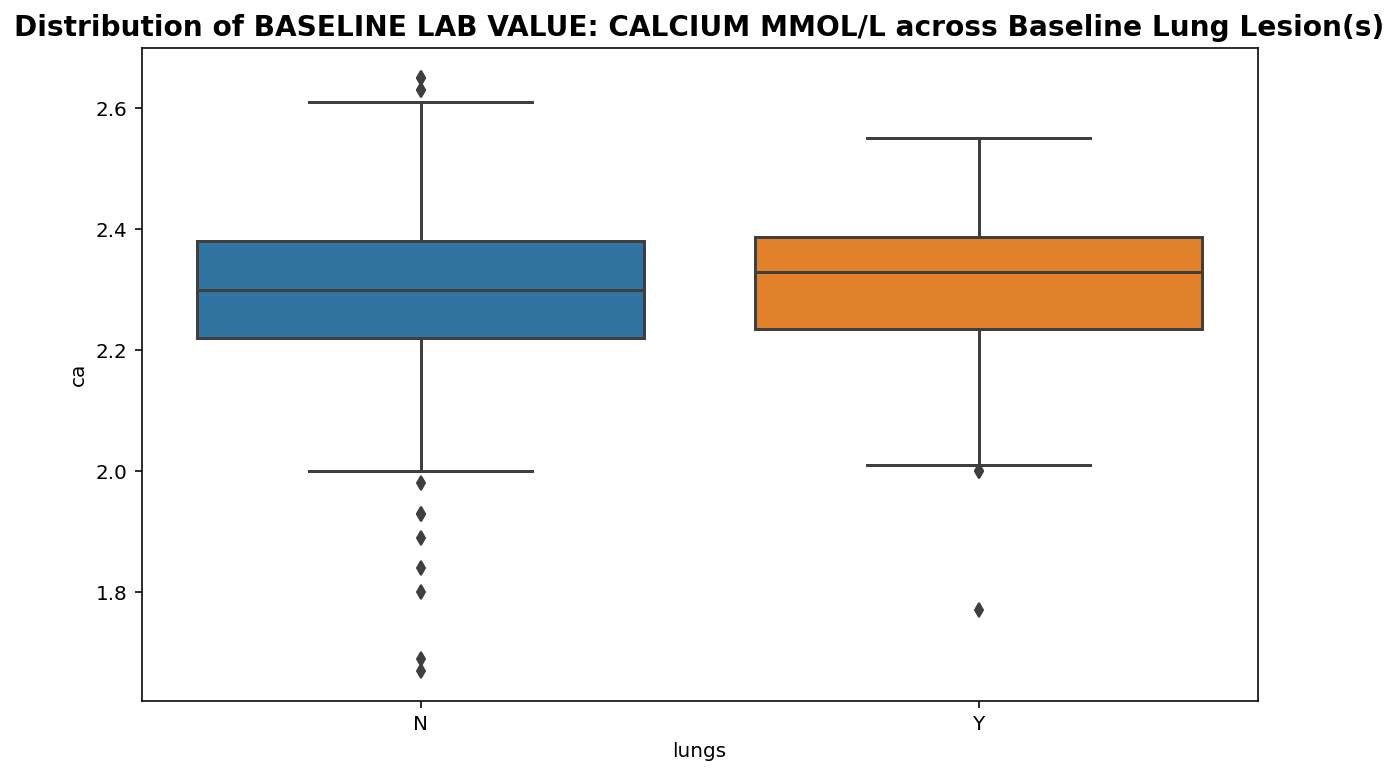

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(
    "Distribution of BASELINE LAB VALUE: CALCIUM MMOL/L across Baseline Lung Lesion(s)",
    fontsize=14,
    weight="bold",
)
sns.boxplot(x="lungs", y="ca", data=data)
plt.show()

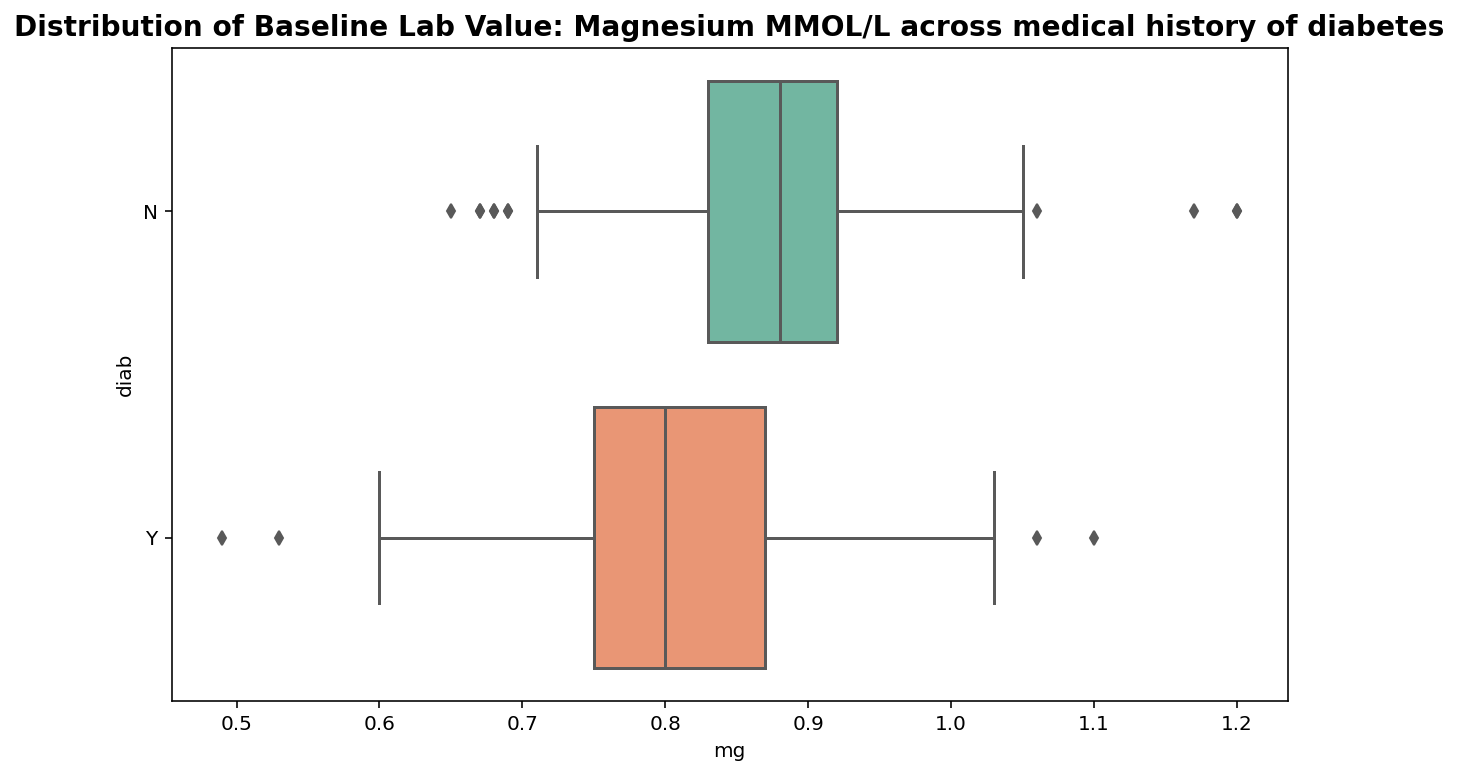

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(
    "Distribution of Baseline Lab Value: Magnesium MMOL/L across medical history of diabetes",
    fontsize=14,
    weight="bold",
)
sns.boxplot(x="mg", y="diab", data=data,palette = "Set2")
plt.show()

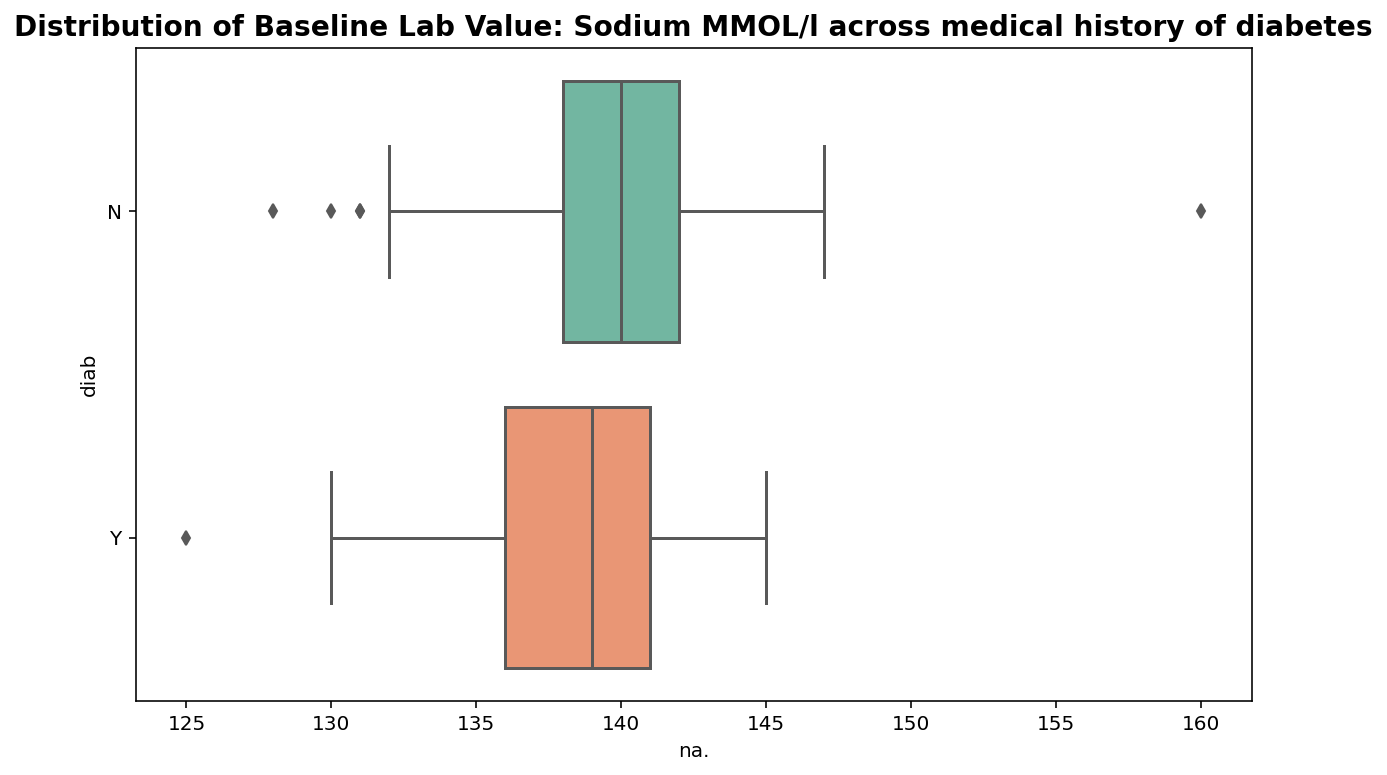

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(
    "Distribution of Baseline Lab Value: Sodium MMOL/l across medical history of diabetes",
    fontsize=14,
    weight="bold",
)
sns.boxplot(x="na.", y="diab", data=data,palette = "Set2")
plt.show()

### Correlation Analysis

In [ ]:
# Create a list of the columns that are numeric
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()


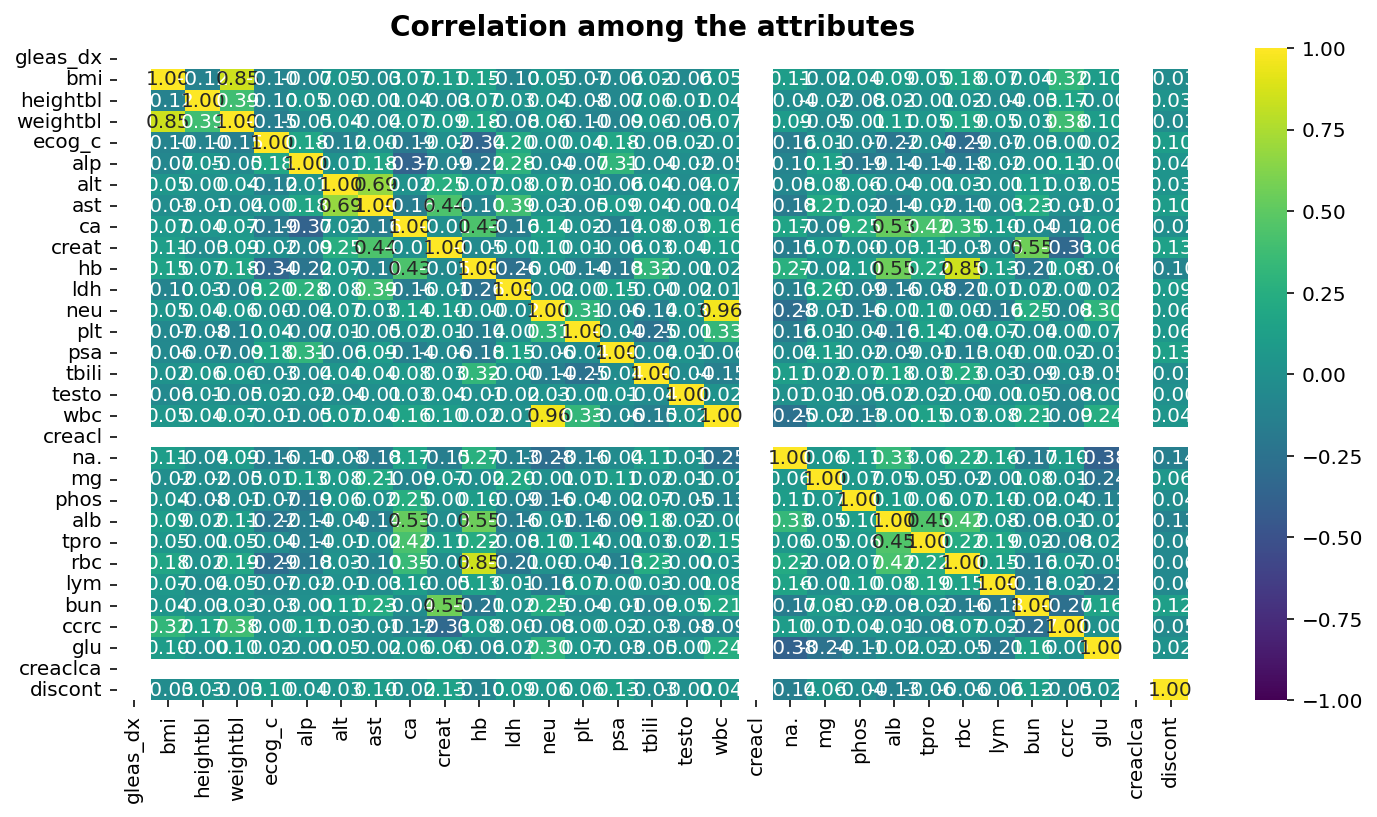

In [ ]:
plt.figure(figsize=(12, 6))
plt.title(
    "Correlation among the attributes", fontsize=14, weight="bold",
)
sns.heatmap(
    data[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis"
)
plt.show()

## Data Preprocessing

- There are no missing values.

## Feature Engineering

In [ ]:
#Create a new copy of the data for further analysis
df1= data.copy()

In [ ]:
#Check the first few rows of the new data frame
df1.head(5)

,gleas_dx,tstag_dx,agegrp2,race_c,bmi,heightbl,weightbl,region_c,smoke,smokfreq,smokstat,ecog_c,trt1_id,trt2_id,trt3_id,alp,alt,ast,ca,creat,hb,ldh,neu,plt,psa,tbili,testo,wbc,creacl,na.,mg,phos,alb,tpro,rbc,lym,bun,ccrc,glu,creaclca,non_target,target,bone,rectal,lymph_nodes,kidneys,lungs,liver,pleura,other,prostate,adrenal,bladder,peritoneum,colon,head_and_neck,soft_tissue,stomach,pancreas,thyroid,abdominal,orchidectomy,prostatectomy,turp,lymphadenectomy,spinal_cord_surgery,bilateral_orchidectomy,prior_radiotherapy,analgesics,anti_androgens,glucocorticoid,gonadotropin,bisphosphonate,corticosteroid,imidazole,ace_inhibitors,beta_blocking,hmg_coa_reduct,estrogens,anti_estrogens,artthrom,cerebacc,chf,dvt,diab,gastrefl,gibleed,mi,pud,pulmemb,pathfrac,spincomp,copd,mhblood,mhcard,mhcongen,mhear,mhendo,mheye,mhgastro,mhgen,mhhepato,mhimmune,mhinfect,mhinjury,mhinvest,mhmetab,mhmuscle,mhneopla,mhnerv,mhpsych,mhrenal,mhresp,mhskin,mhsocial,mhsurg,mhvasc,death,endtrs_c,discont
0,7.396,T3,65-74,White,26.800,175.000,82.000,WESTERN EUROPE,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,2.000,PLACEBO,DOCETAXEL,PREDNISONE,153,21.000,17.000,2.410,103.000,12.600,162.000,3.710,389.000,45.200,8.000,0.863,5.010,81.029,140.000,0.850,1.120,41.000,69.000,4.540,0.700,7.900,71.000,5.100,82.992,Y,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,progression,0
1,7.396,T3,65-74,White,27.400,179.000,87.800,EASTERN EUROPE,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,1.000,PLACEBO,DOCETAXEL,PREDNISONE,69,15.000,27.000,2.210,79.000,9.600,151.000,2.480,238.000,71.200,4.000,0.863,4.370,81.029,133.000,0.690,1.040,33.000,121.000,3.020,1.640,12.200,94.000,4.700,82.992,Y,Y,Y,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,possible_AE,0
2,7.396,T3,18-64,White,28.700,170.000,83.000,WESTERN EUROPE,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,0.000,PLACEBO,DOCETAXEL,PREDNISONE,102,18.000,23.000,2.230,56.000,13.000,194.000,2.980,345.000,597.000,4.000,0.729,4.010,81.029,137.000,0.860,1.240,39.000,61.000,4.330,0.540,4.800,155.000,7.500,82.992,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,YES,NO,YES,YES,NO,NO,NO,NO,YES,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,possible_AE,0
3,7.396,T3,65-74,White,27.900,169.000,79.600,WESTERN EUROPE,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,1.000,PLACEBO,DOCETAXEL,PREDNISONE,62,9.000,16.000,2.440,73.000,12.900,231.000,5.200,429.000,257.614,4.000,0.863,6.350,81.029,141.000,0.830,1.070,44.000,76.000,4.570,0.850,5.800,97.903,12.800,82.992,Y,Y,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,YES,YES,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,N,N,N,N,N,N,N,N,N,N,N,N,N,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,NO,YES,progression,0
4,7.396,T3,18-64,White,33.200,182.100,108.000,NORTH AMERICA,NO,GREATER THAN OR EQUAL TO 1 PACK PER DAY,ONGOING/CURRENT,1.000,PLACEBO,DOCETAXEL,PREDNISONE,95,31.000,18.000,2.380,106.000,11.300,237.000,1.880,119.000,13.300,7.000,0.863,2.980,81.029,138.000,0.900,1.100,45.000,62.000,3.800,0.850,7.900,97.903,17.000,82.992,Y,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,YES,YES,YES,YES,NO,NO,NO,NO,YES,YES,NO,NO,N,N,N,N,Y,N,N,N,N,N,N,N,N,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,YES,YES,YES,YES,NO,NO,NO,YES,YES,NO,possible_AE,0


In [ ]:
# Separating data into features and target
X = df1.drop(columns="discont")
X = pd.get_dummies(X) #Encode categorical variables
Y = df1["discont"]

In [ ]:
#Examine few rows of the data
X.head()

,gleas_dx,bmi,heightbl,weightbl,ecog_c,alp,alt,ast,ca,creat,hb,ldh,neu,plt,psa,tbili,testo,wbc,creacl,na.,mg,phos,alb,tpro,rbc,lym,bun,ccrc,glu,creaclca,tstag_dx_T3,agegrp2_18-64,agegrp2_65-74,agegrp2_>=75,race_c_Black,race_c_Other,race_c_White,region_c_EASTERN EUROPE,region_c_NORTH AMERICA,region_c_OTHER,region_c_WESTERN EUROPE,smoke_NO,smokfreq_GREATER THAN OR EQUAL TO 1 PACK PER DAY,smokstat_ONGOING/CURRENT,trt1_id_PLACEBO,trt2_id_DOCETAXEL,trt3_id_PREDNISONE,non_target_N,non_target_Y,target_N,target_Y,bone_N,bone_Y,rectal_N,rectal_Y,lymph_nodes_N,lymph_nodes_Y,kidneys_N,kidneys_Y,lungs_N,lungs_Y,liver_N,liver_Y,pleura_N,pleura_Y,other_N,other_Y,prostate_N,prostate_Y,adrenal_N,adrenal_Y,bladder_N,bladder_Y,peritoneum_N,peritoneum_Y,colon_N,colon_Y,head_and_neck_N,soft_tissue_N,soft_tissue_Y,stomach_N,pancreas_N,thyroid_N,abdominal_N,abdominal_Y,orchidectomy_N,orchidectomy_Y,prostatectomy_N,prostatectomy_Y,turp_N,turp_Y,lymphadenectomy_N,lymphadenectomy_Y,spinal_cord_surgery_N,spinal_cord_surgery_Y,bilateral_orchidectomy_N,bilateral_orchidectomy_Y,prior_radiotherapy_N,prior_radiotherapy_Y,analgesics_NO,analgesics_YES,anti_androgens_NO,anti_androgens_YES,glucocorticoid_NO,glucocorticoid_YES,gonadotropin_NO,gonadotropin_YES,bisphosphonate_NO,bisphosphonate_YES,corticosteroid_NO,corticosteroid_YES,imidazole_NO,imidazole_YES,ace_inhibitors_NO,ace_inhibitors_YES,beta_blocking_NO,beta_blocking_YES,hmg_coa_reduct_NO,hmg_coa_reduct_YES,estrogens_NO,estrogens_YES,anti_estrogens_NO,anti_estrogens_YES,artthrom_N,cerebacc_N,cerebacc_Y,chf_N,chf_Y,dvt_N,dvt_Y,diab_N,diab_Y,gastrefl_N,gastrefl_Y,gibleed_N,gibleed_Y,mi_N,mi_Y,pud_N,pud_Y,pulmemb_N,pulmemb_Y,pathfrac_N,pathfrac_Y,spincomp_N,copd_N,copd_Y,mhblood_NO,mhblood_YES,mhcard_NO,mhcard_YES,mhcongen_NO,mhcongen_YES,mhear_NO,mhear_YES,mhendo_NO,mhendo_YES,mheye_NO,mheye_YES,mhgastro_NO,mhgastro_YES,mhgen_NO,mhgen_YES,mhhepato_NO,mhhepato_YES,mhimmune_NO,mhimmune_YES,mhinfect_NO,mhinfect_YES,mhinjury_NO,mhinjury_YES,mhinvest_NO,mhinvest_YES,mhmetab_NO,mhmetab_YES,mhmuscle_NO,mhmuscle_YES,mhneopla_YES,mhnerv_NO,mhnerv_YES,mhpsych_NO,mhpsych_YES,mhrenal_NO,mhrenal_YES,mhresp_NO,mhresp_YES,mhskin_NO,mhskin_YES,mhsocial_NO,mhsocial_YES,mhsurg_NO,mhsurg_YES,mhvasc_NO,mhvasc_YES,death_NO,death_YES,endtrs_c_AE,endtrs_c_possible_AE,endtrs_c_progression
0,7.396,26.800,175.000,82.000,2.000,153,21.000,17.000,2.410,103.000,12.600,162.000,3.710,389.000,45.200,8.000,0.863,5.010,81.029,140.000,0.850,1.120,41.000,69.000,4.540,0.700,7.900,71.000,5.100,82.992,1,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1
1,7.396,27.400,179.000,87.800,1.000,69,15.000,27.000,2.210,79.000,9.600,151.000,2.480,238.000,71.200,4.000,0.863,4.370,81.029,133.000,0.690,1.040,33.000,121.000,3.020,1.640,12.200,94.000,4.700,82.992,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
2,7.396,28.700,170.000,83.000,0.000,102,18.000,23.000,2.230,56.000,13.000,194.000,2.980,345.000,597.000,4.000,0.729,4.010,81.029,137.000,0.860,1.240,39.000,61.000,4.330,0.540,4.800,155.000,7.500,82.992,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
3,7.396,27.900,169.000,79.600,1.000,62,9.000,16.000,2.44

In [ ]:
X.shape

(526, 199)

In [ ]:
** It is observed that the categorical columns have been encoded

In [ ]:
# Splitting data into train and test set:
# first we split data into 2 parts, say temporary and test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print(X_train.shape,X_test.shape)

(420, 199) (106, 199)


## Model Building

### Logistic Regression Model

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_pred= lr_model.predict(X_test)

### Decision Tree Classifier

In [ ]:
dtc_model = DecisionTreeClassifier()

In [ ]:
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred= dtc_model.predict(X_test)

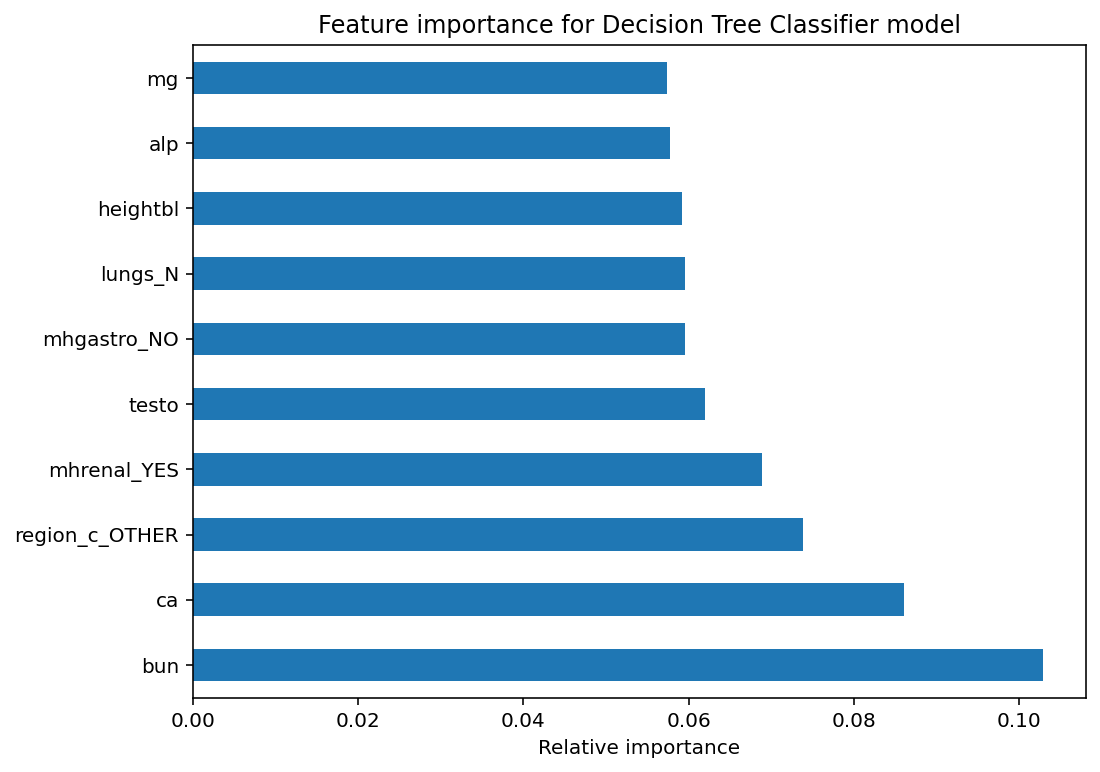

In [ ]:
#Plot the 10 most important features in the logistic regression model
plt.figure(figsize =(8,6))
feat_importances =pd.Series(dtc_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importance for Decision Tree Classifier model")
plt.xlabel("Relative importance")
plt.show();

### Gradient Boosting Classifier

In [ ]:
gbc_model = GradientBoostingClassifier()

In [ ]:
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gbc_pred= gbc_model.predict(X_test)

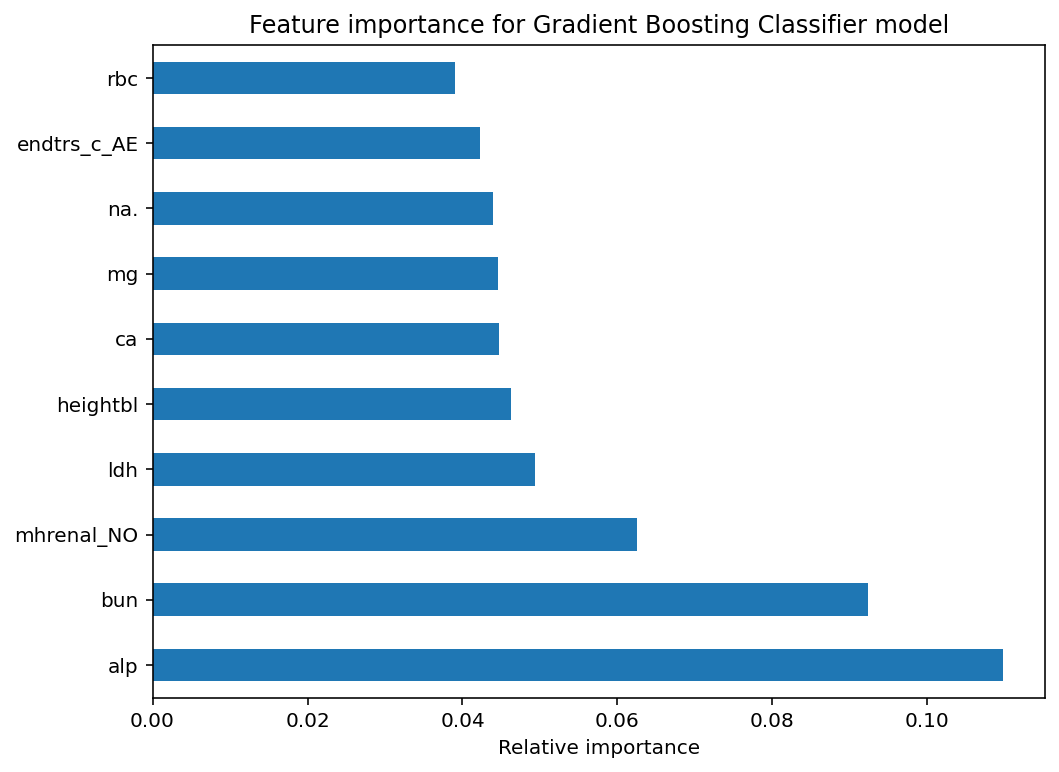

In [ ]:
plt.figure(figsize =(8,6))
feat_importances =pd.Series(gbc_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importance for Gradient Boosting Classifier model")
plt.xlabel("Relative importance")
plt.show();

### Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pred= rf_model.predict(X_test)

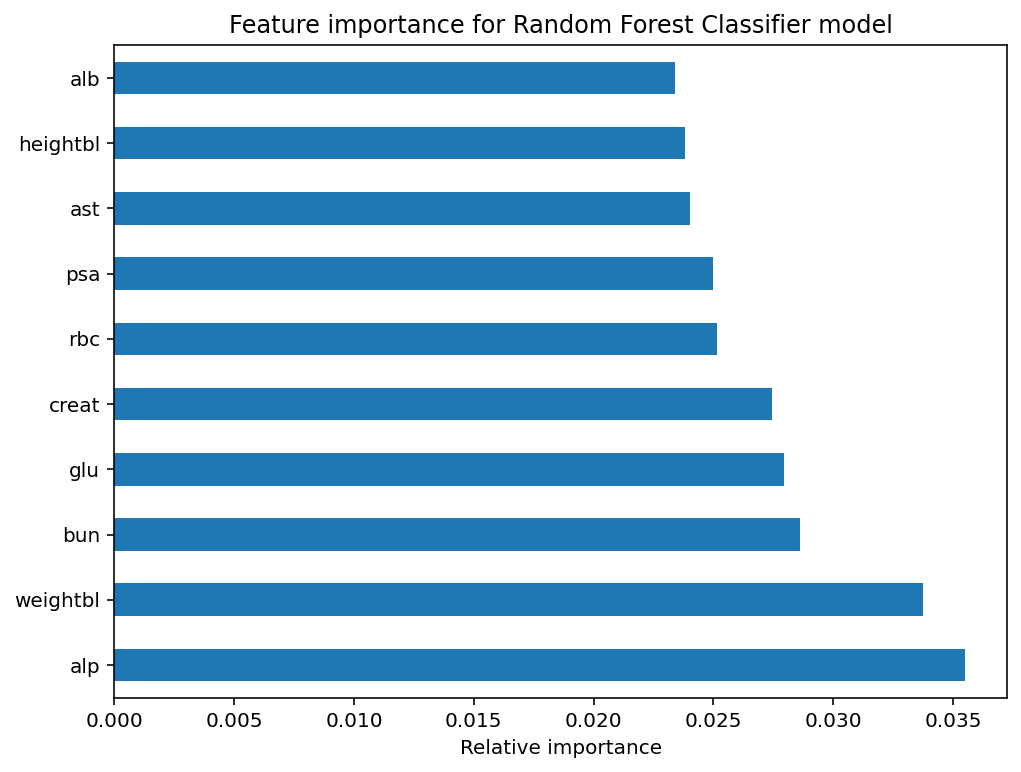

In [ ]:
plt.figure(figsize =(8,6))
feat_importances =pd.Series(rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importance for Random Forest Classifier model")
plt.xlabel("Relative importance")
plt.show();

### Gaussian Naive Bayes 

In [ ]:
gnb_model = GaussianNB()

In [ ]:
gnb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
gnb_pred= gnb_model.predict(X_test)

In [ ]:
### Ensemble model

In [ ]:
ensemble_model = VotingClassifier(estimators =[('lr',lr_model),('dtc',dtc_model), ('gbc',gbc_model),('rf',rf_model),('gnb',gnb_model)],voting ='soft',weights=[1,2,3,4,5])

In [ ]:
ensemble_model.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dtc', DecisionTreeClassifier()),
                             ('gbc', GradientBoostingClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB())],
                 voting='soft', weights=[1, 2, 3, 4, 5])

In [ ]:
ensemble_pred = ensemble_model.predict(X_test)

## Model Evaluation

#### Evaluating the logistic regression model

In [ ]:
lr_accuracy = round(accuracy_score(y_test,lr_pred),2)
lr_accuracy

0.86

In [ ]:
lr_cm = confusion_matrix(y_test,lr_pred)
pprint(lr_cm)

array([[91,  2],
       [13,  0]])


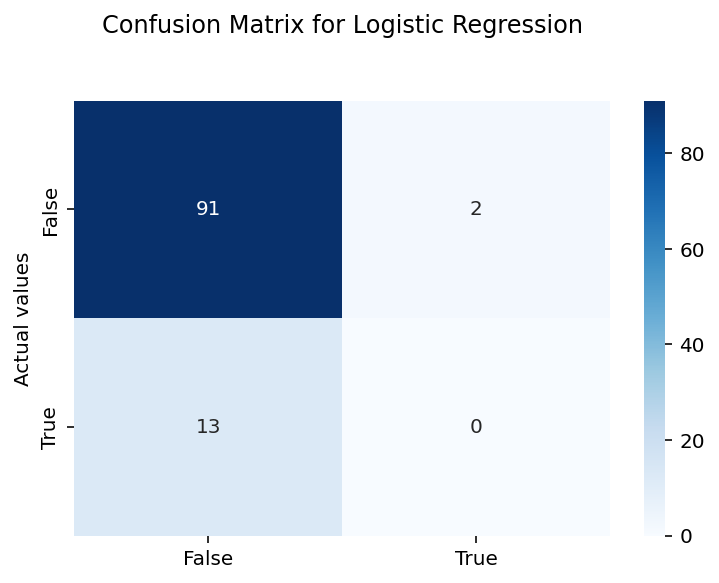

In [ ]:
ax = sns.heatmap(lr_cm, annot= True,cmap='Blues')
ax.set_title("Confusion Matrix for Logistic Regression\n\n")
ax.set_ylabel("Actual values")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show();

In [ ]:
lr_report= classification_report(y_test,lr_pred)
pprint(lr_report)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.88      0.98      0.92        93\n'
 '           1       0.00      0.00      0.00        13\n'
 '\n'
 '    accuracy                           0.86       106\n'
 '   macro avg       0.44      0.49      0.46       106\n'
 'weighted avg       0.77      0.86      0.81       106\n')


#### Evaluating the Decision Tree Classifier

In [ ]:
dtc_accuracy = round(accuracy_score(y_test,dtc_pred),2)
dtc_accuracy

0.84

In [ ]:
dtc_cm = confusion_matrix(y_test,dtc_pred)
pprint(dtc_cm)

array([[87,  6],
       [11,  2]])


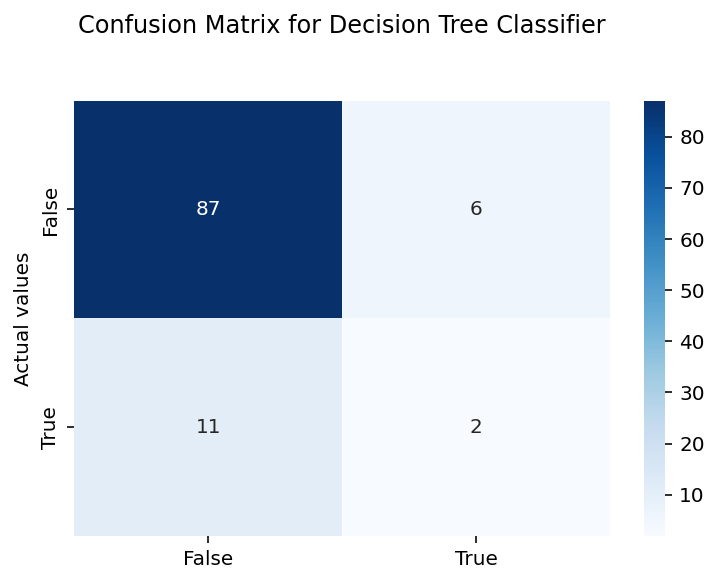

In [ ]:
ax = sns.heatmap(dtc_cm, annot= True,cmap='Blues')
ax.set_title("Confusion Matrix for Decision Tree Classifier\n\n")
ax.set_ylabel("Actual values")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show();

In [ ]:
dtc_report= classification_report(y_test,dtc_pred)
pprint(dtc_report)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.89      0.94      0.91        93\n'
 '           1       0.25      0.15      0.19        13\n'
 '\n'
 '    accuracy                           0.84       106\n'
 '   macro avg       0.57      0.54      0.55       106\n'
 'weighted avg       0.81      0.84      0.82       106\n')


#### Evaluating the Gradient Boosting Classifier

In [ ]:
gbc_accuracy = round(accuracy_score(y_test,gbc_pred),2)
gbc_accuracy

0.87

In [ ]:
gbc_cm = confusion_matrix(y_test,gbc_pred)
pprint(gbc_cm)

array([[91,  2],
       [12,  1]])


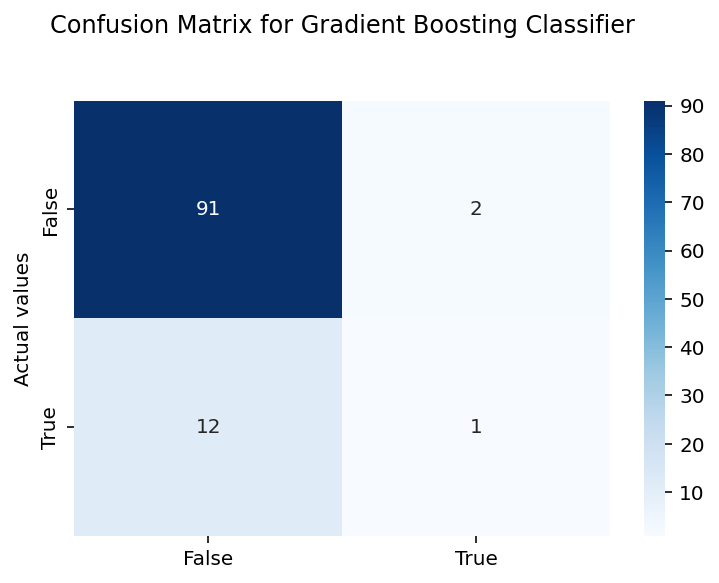

In [ ]:
ax = sns.heatmap(gbc_cm, annot= True,cmap='Blues')
ax.set_title("Confusion Matrix for Gradient Boosting Classifier\n\n")
ax.set_ylabel("Actual values")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show();

In [ ]:
gbc_report= classification_report(y_test,gbc_pred)
pprint(gbc_report)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.88      0.98      0.93        93\n'
 '           1       0.33      0.08      0.12        13\n'
 '\n'
 '    accuracy                           0.87       106\n'
 '   macro avg       0.61      0.53      0.53       106\n'
 'weighted avg       0.82      0.87      0.83       106\n')


#### Evaluating the Random Forest Classifier

In [ ]:
rf_accuracy = round(accuracy_score(y_test,rf_pred),2)
rf_accuracy

0.88

In [ ]:
rf_cm = confusion_matrix(y_test,rf_pred)
pprint(rf_cm)

array([[93,  0],
       [13,  0]])


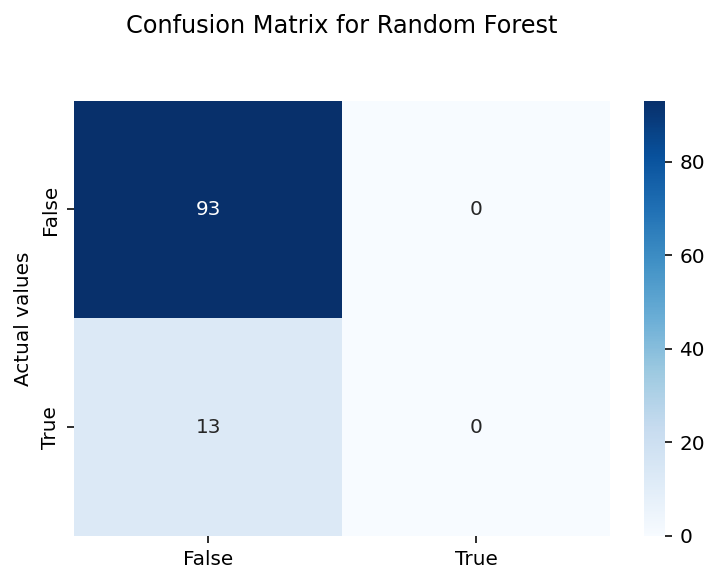

In [ ]:
ax = sns.heatmap(rf_cm, annot= True,cmap='Blues')
ax.set_title("Confusion Matrix for Random Forest\n\n")
ax.set_ylabel("Actual values")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show();

In [ ]:
rf_report= classification_report(y_test,rf_pred)
pprint(rf_report)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.88      1.00      0.93        93\n'
 '           1       0.00      0.00      0.00        13\n'
 '\n'
 '    accuracy                           0.88       106\n'
 '   macro avg       0.44      0.50      0.47       106\n'
 'weighted avg       0.77      0.88      0.82       106\n')


#### Evaluating the Gaussian Naive Bayes 

In [ ]:
gnb_accuracy = round(accuracy_score(y_test,gnb_pred),2)
gnb_accuracy

0.46

In [ ]:
gnb_cm = confusion_matrix(y_test,gnb_pred)
pprint(gnb_cm)

array([[42, 51],
       [ 6,  7]])


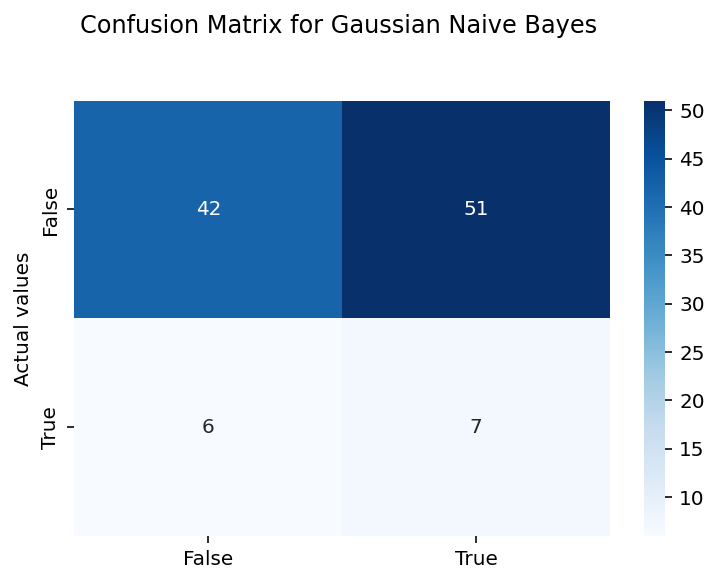

In [ ]:
ax = sns.heatmap(gnb_cm, annot= True,cmap='Blues')
ax.set_title("Confusion Matrix for Gaussian Naive Bayes \n\n")
ax.set_ylabel("Actual values")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show();

In [ ]:
gnb_report= classification_report(y_test,gnb_pred)
pprint(gnb_report)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.88      0.45      0.60        93\n'
 '           1       0.12      0.54      0.20        13\n'
 '\n'
 '    accuracy                           0.46       106\n'
 '   macro avg       0.50      0.50      0.40       106\n'
 'weighted avg       0.78      0.46      0.55       106\n')


In [ ]:
ensemble_accuracy = round(accuracy_score(y_test,ensemble_pred),2)
ensemble_accuracy

0.86

In [ ]:
ensemble_cm = confusion_matrix(y_test,gnb_pred)
pprint(ensemble_cm)

array([[42, 51],
       [ 6,  7]])


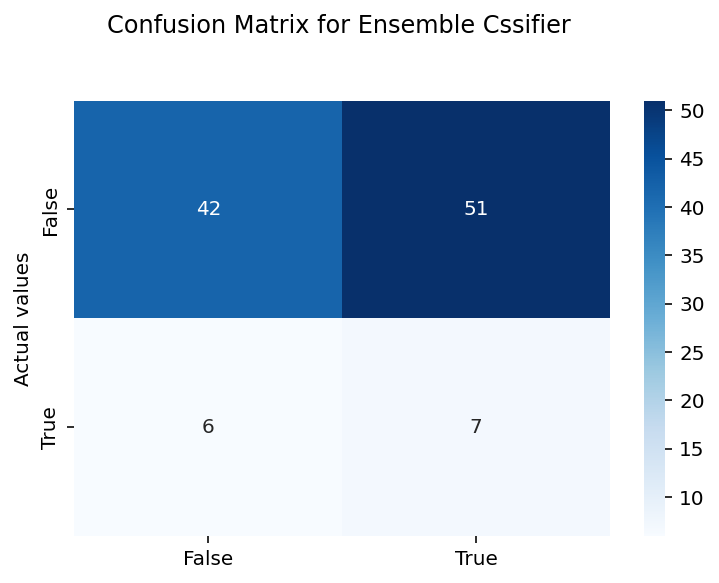

In [ ]:
ax = sns.heatmap(ensemble_cm, annot= True,cmap='Blues')
ax.set_title("Confusion Matrix for Ensemble Cssifier \n\n")
ax.set_ylabel("Actual values")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show();

In [ ]:
ensemble_report= classification_report(y_test,ensemble_pred)
pprint(ensemble_report)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.88      0.97      0.92        93\n'
 '           1       0.25      0.08      0.12        13\n'
 '\n'
 '    accuracy                           0.86       106\n'
 '   macro avg       0.57      0.52      0.52       106\n'
 'weighted avg       0.80      0.86      0.82       106\n')


#### ROC Curve and Area Under the Curve (AUC)

In [ ]:
# Logistic Regression
lr_pred_prob = lr_model.predict_proba(X_test)[:,1]
lr_fpr,lr_tpr,lr_threshold = roc_curve(y_test,lr_pred_prob)
lr_roc_auc = auc(lr_fpr,lr_tpr)
lr_precision,lr_recall,lr_threshold= precision_recall_curve(y_test, lr_pred_prob)

# Decision Tree Classifier 
dtc_pred_prob = dtc_model.predict_proba(X_test)[:,1]
dtc_fpr,dtc_tpr,dtc_threshold = roc_curve(y_test,dtc_pred_prob)
dtc_roc_auc = auc(dtc_fpr,dtc_tpr)
dtc_precision,dtc_recall,dtc_threshold= precision_recall_curve(y_test, dtc_pred_prob)

# Gradient Boosting Classifier
gbc_pred_prob = gbc_model.predict_proba(X_test)[:,1]
gbc_fpr,gbc_tpr,gbc_threshold = roc_curve(y_test,gbc_pred_prob)
gbc_roc_auc = auc(gbc_fpr,gbc_tpr)
gbc_precision,gbc_recall,gbc_threshold= precision_recall_curve(y_test, gbc_pred_prob)

# Random Forest Classifier
rf_pred_prob = rf_model.predict_proba(X_test)[:,1]
rf_fpr,rf_tpr,rf_threshold = roc_curve(y_test,rf_pred_prob)
rf_roc_auc = auc(rf_fpr,rf_tpr)
rf_precision,rf_recall,rf_threshold= precision_recall_curve(y_test, rf_pred_prob)

# Gaussian Naive Bayes
gnb_pred_prob = gnb_model.predict_proba(X_test)[:,1]
gnb_fpr,gnb_tpr,gnb_threshold = roc_curve(y_test,gnb_pred_prob)
gnb_roc_auc = auc(gnb_fpr,gnb_tpr)
gnb_precision,gnb_recall,gnb_threshold= precision_recall_curve(y_test, gnb_pred_prob)

# Ensemble Classifier
ensemble_pred_prob = ensemble_model.predict_proba(X_test)[:,1]
ensemble_fpr,ensemble_tpr,ensemble_threshold = roc_curve(y_test,ensemble_pred_prob)
ensemble_roc_auc = auc(ensemble_fpr,ensemble_tpr)
ensemble_precision,ensemble_recall,ensemble_threshold= precision_recall_curve(y_test, ensemble_pred_prob)


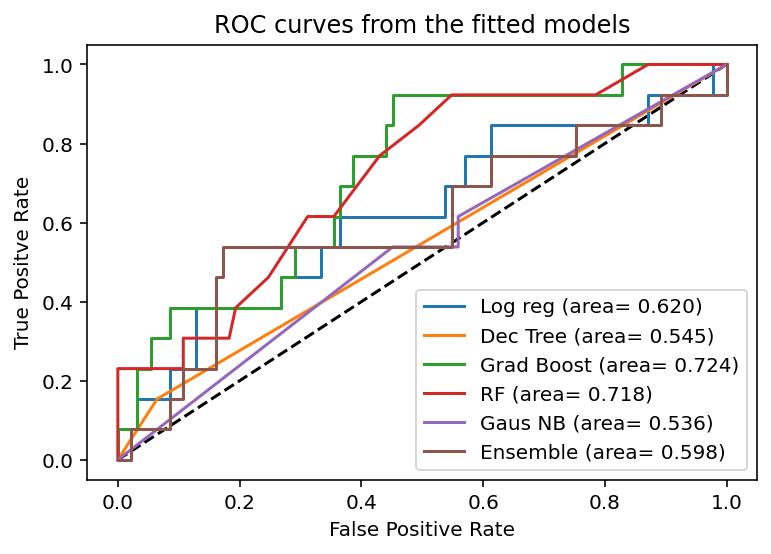

In [ ]:
# Plot ROC Curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(lr_fpr,lr_tpr, label = 'Log reg (area= %0.3f)' % lr_roc_auc)
plt.plot(dtc_fpr,dtc_tpr, label = 'Dec Tree (area= %0.3f)' % dtc_roc_auc)
plt.plot(gbc_fpr,gbc_tpr, label = 'Grad Boost (area= %0.3f)' % gbc_roc_auc)
plt.plot(rf_fpr,rf_tpr, label = 'RF (area= %0.3f)' % rf_roc_auc)
plt.plot(gnb_fpr,gnb_tpr, label = 'Gaus NB (area= %0.3f)' % gnb_roc_auc)
plt.plot(ensemble_fpr,ensemble_tpr, label = 'Ensemble (area= %0.3f)' % ensemble_roc_auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positve Rate")
plt.title("ROC curves from the fitted models")
plt.legend(loc = "best")
plt.show()

#### Precision-Recall Curve

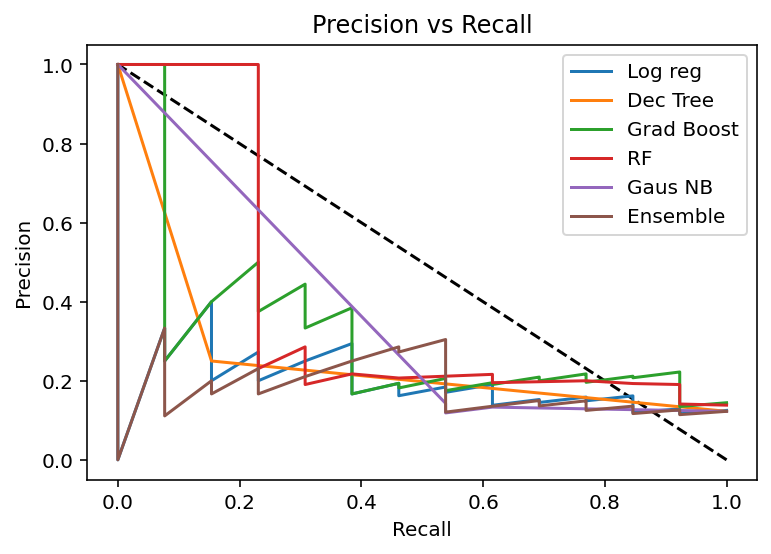

In [ ]:
# Plot Precision-Recall Curve
plt.plot([1,0],[0,1], 'k--')
plt.plot(lr_recall,lr_precision, label = 'Log reg')
plt.plot(dtc_recall,dtc_precision, label = 'Dec Tree')
plt.plot(gbc_recall,gbc_precision, label = 'Grad Boost')
plt.plot(rf_recall,rf_precision, label = 'RF')
plt.plot(gnb_recall,gnb_precision, label = 'Gaus NB')
plt.plot(ensemble_recall,ensemble_precision, label = 'Ensemble')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall")
plt.legend(loc = "best")
plt.show()

In [ ]:
### Hyperparameter Tuning for the Models

In [ ]:
# Tuning Decision Tree Classifier
dtc_params = {"criterion":['gini','entropy'],"max_depth":range(1,10),"min_samples_split": range(1,10),"min_samples_leaf":range(1,5)}
dtc_tuned= GridSearchCV(dtc_model,param_grid = dtc_params, cv=10, verbose=1, n_jobs = -1,scoring='accuracy')
dtc_tuned.fit(X_train,y_train)


Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='accuracy', verbose=1)

In [ ]:
dtc_tuned.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
dtc_tuned.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [ ]:
dtc_tuned.best_score_ #For model accuracy

0.9333333333333333

In [ ]:
# Tuning Gradient Boosting Classifier
gbc_params = [{"max_depth": list(range(1,10)),"max_features":list(range(1,10)),"min_samples_leaf":list(range(1,5))}]
gbc_tuned = GridSearchCV(gbc_model,gbc_params, cv=10,scoring='accuracy')
gbc_tuned.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_leaf': [1, 2, 3, 4]}],
             scoring='accuracy')

In [ ]:
gbc_tuned.best_params_

{'max_depth': 2, 'max_features': 7, 'min_samples_leaf': 4}

In [ ]:
gbc_tuned.best_estimator_

GradientBoostingClassifier(max_depth=2, max_features=7, min_samples_leaf=4)

In [ ]:
gbc_tuned.best_score_ #For model accuracy

0.9357142857142857

In [ ]:
# Tuning Random Forest Classifier
rf_params = [{"max_depth": list(range(1,10)),"max_features":list(range(1,10)),"min_samples_leaf":list(range(1,5))}]
rf_tuned = GridSearchCV(rf_model,rf_params, cv=10,scoring='accuracy')
rf_tuned.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_leaf': [1, 2, 3, 4]}],
             scoring='accuracy')

In [ ]:
rf_tuned.best_params_


{'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 1}

In [ ]:
rf_tuned.best_estimator_

RandomForestClassifier(max_depth=1, max_features=1)

In [ ]:
rf_tuned.best_score_ #For model accuracy

0.9333333333333333